# QCTO - Workplace Module

### Project Title: Vegetable Prices
#### Done By: Nkhubalale Emmanuel Nkadimeng

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
<a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This project aims to analyze the pricing trends of various vegetables over time, with a focus on identifying seasonal patterns and potential outliers in pricing. By understanding these trends, stakeholders can make informed decisions regarding pricing strategies, inventory management, and market forecasting.

* **Details:** 
  - **Problem Domain:** The vegetable market is subject to fluctuations due to various factors such as seasonality, demand changes, and supply chain dynamics. Understanding these fluctuations is crucial for farmers, retailers, and consumers alike.
  - **Specific Questions:** 
    - What are the average prices of different vegetables across various quarters of the year?
    - Are there identifiable seasonal trends in the pricing of specific vegetables?
    - How do prices correlate among different types of vegetables?
    - Are there any outliers in the price data that warrant further investigation?
  - **Significance:** This analysis is significant as it provides insights into price behavior over time, helping stakeholders optimize their operations and strategies. By identifying seasonal trends and potential outliers, businesses can better manage their supply chains and pricing strategies, ultimately leading to improved profitability and customer satisfaction.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [145]:
# Import necessary libraries
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns     # For advanced visualizations
from datetime import datetime  # For date handling

from statsmodels.tsa.seasonal import seasonal_decompose  # For time series decomposition
from statsmodels.tsa.statespace.sarimax import SARIMAX   # For SARIMAX model
from sklearn.model_selection import train_test_split     # For splitting data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluation metrics
import itertools  # For generating parameter grid
import os  # For file operations
import pickle  # For saving models


---
<a id="two"></a>
## **Data Collection and Description**
[Back to Table of Contents](#cont)

* **Purpose:** The purpose of this section is to describe how the Vegetable Prices dataset was collected and provide an overview of its characteristics, including its sources, collection methods, and data types.
* **Details:** The Vegetable Prices dataset is sourced from Kaggle, a popular platform for data science and machine learning enthusiasts. Kaggle hosts a variety of datasets contributed by users, making it an excellent resource for accessing diverse data.

### **Dataset Overview**
- **Size:** The dataset typically contains thousands of entries covering several years.
- **Scope:** It includes price data for various vegetables sold in different markets over a specified time period.
- **Types of Data Available:**
  - **Numerical:** Price and quantity sold.
  - **Categorical:** Vegetable names and market names.
  - **Temporal:** Dates of recorded prices.

This dataset provides valuable insights into market trends and pricing dynamics, aiding in analyses related to seasonal variations and economic factors affecting vegetable pricing.


---


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [129]:
# Load the dataset from a CSV file
vegetable_prices = pd.read_csv('prices.csv')

# Display the first few rows of the dataset to understand its structure
display(vegetable_prices.head())

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** This section outlines the steps involved in handling missing values, removing outliers, correcting errors, and possibly reducing the dataset by filtering based on certain criteria or features.

### Steps for Data Cleaning and Filtering

1. **Handling Missing Values:**
   - Identify missing values in the dataset using `isnull()` or `isna()`.
   - Decide on a strategy to handle them:
     - **Removal**: Drop rows or columns with excessive missing values.
     - **Imputation**: Fill missing values with appropriate substitutes (mean, median, mode, etc.).

  

In [130]:
# Check for missing values
missing_values = vegetable_prices.isnull().sum()
display(missing_values)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [131]:
# check for duplicates 

duplicates = vegetable_prices.duplicated().sum()
print(f"There are {duplicates} duplicate rows in the dataset")

There are 0 duplicate rows in the dataset


Checking for Negative Prices

As part of our data cleaning process, it is essential to verify that all prices in the dataset are valid. Negative prices are not logical in the context of vegetable pricing and may indicate data entry errors or inconsistencies. 

In this step, we will check each price column for any negative values and count how many such instances exist. This will help us identify any potential issues that need to be addressed before proceeding with further analysis.

In [132]:
# Check for negative prices in the relevant columns
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Create a DataFrame to store the results
negative_prices = {}

for column in price_columns:
    negative_count = (vegetable_prices[column] < 0).sum()  # Count negative prices
    negative_prices[column] = negative_count

# Display the count of negative prices for each vegetable
print("Negative Prices Count:")
for vegetable, count in negative_prices.items():
    print(f"{vegetable}: {count}")

Negative Prices Count:
Bhindi (Ladies finger): 0
Tomato: 0
Onion: 0
Potato: 0
Brinjal: 0
Garlic: 0
Peas: 0
Methi: 0
Green Chilli: 0
Elephant Yam (Suran): 0


Checking data types of the stored data.

In [133]:
vegetable_prices.dtypes

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object

In [134]:
# Convert the 'Price Dates' column to datetime format
vegetable_prices['Price Dates'] = pd.to_datetime(vegetable_prices['Price Dates'], format='%d-%m-%Y', errors='coerce')

# List of price columns that need to be converted to float
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Convert each price column to float
for column in price_columns:
    vegetable_prices[column] = vegetable_prices[column].astype(float)

# Verify the data types after conversion
print(vegetable_prices.dtypes)

Price Dates               datetime64[ns]
Bhindi (Ladies finger)           float64
Tomato                           float64
Onion                            float64
Potato                           float64
Brinjal                          float64
Garlic                           float64
Peas                             float64
Methi                            float64
Green Chilli                     float64
Elephant Yam (Suran)             float64
dtype: object


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---
### 1. Summary Statistics
Before diving into visualizations, it's helpful to look at summary statistics to understand the central tendency and spread of the data.



In [135]:

# Display summary statistics for numerical columns
summary_statistics = vegetable_prices.describe()
display(summary_statistics)

Price Dates  Bhindi (Ladies finger)      Tomato  \
count                            287              287.000000  287.000000   
mean   2023-07-04 21:54:33.867595776               29.444251   16.006969   
min              2023-01-01 00:00:00               17.000000   16.000000   
25%              2023-04-06 12:00:00               22.000000   16.000000   
50%              2023-07-04 00:00:00               27.500000   16.000000   
75%              2023-10-01 12:00:00               33.000000   16.000000   
max              2024-01-01 00:00:00               60.000000   18.000000   
std                              NaN                8.124815    0.118056   

            Onion      Potato     Brinjal      Garlic        Peas  \
count  287.000000  287.000000  287.000000  287.000000  287.000000   
mean    20.649826   18.585366   31.655052  133.101045   66.658537   
min      8.000000   12.000000   14.000000   50.000000   22.000000   
25%     12.000000   16.000000   25.000000   85.000000   40.000000   
50%     16.000000   20.000000   30.000000  120.000000   60.000000   
75%     25.000000   20.000000   35.000000  165.000000   80.000000   
max     57.000000   24.000000   80.000000  290.000000  150.000000   
std     11.711204    2.726238   11.725421   60.078331   33.302415   

             Methi  Green Chilli  Elephant Yam (Suran)  
count   287.000000    287.000000            287.000000  
mean     20.383275     44.122404             28.797909  
min       5.000000      0.130000             12.000000  
25%       8.000000     35.000000             25.000000  
50%      12.000000     40.000000             30.000000  
75%      16.000000     50.000000             30.000000  
max    2000.000000     90.000000             50.000000  
std     117.428417     12.796590              6.607973

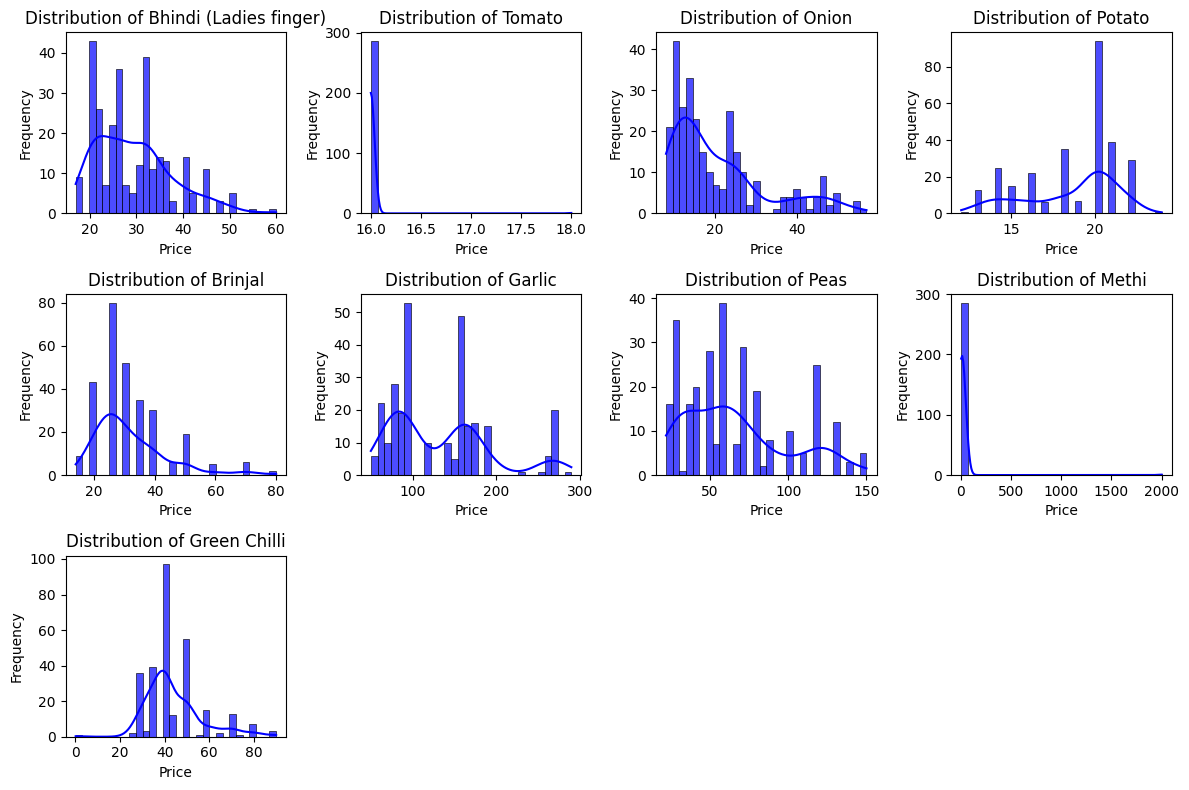

In [136]:

# Visualize the distribution of prices for each vegetable
plt.figure(figsize=(12, 8))
for i, column in enumerate(vegetable_prices.columns[1:-1]):  # Exclude 'Price Dates' and 'Quarter'
    plt.subplot(3, 4, i + 1)
    sns.histplot(vegetable_prices[column], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Observation on Price Distribution

The distribution of prices for tomatoes and methi (fenugreek) reveals that their prices remain relatively constant throughout the observed period, unlike the prices of other vegetables, which exhibit significant fluctuations.

Possible Causes for Price Stability in Tomatoes and Methi:

1. **Supply and Demand Dynamics**:
   - **Stable Supply**: Tomatoes and methi may have a more stable supply chain due to consistent agricultural practices. While other vegetables might face seasonal shortages or surpluses, tomatoes and methi can be produced year-round in various climates.
   - **Consistent Demand**: Both tomatoes and methi are staples in many cuisines, leading to steady demand that mitigates price fluctuations.

2. **Storage and Preservation Techniques**:
   - **Preservation Methods**: Tomatoes can be processed into sauces, pastes, or canned products, allowing for better management of supply during off-peak seasons. Similarly, methi can be dried or frozen, helping to stabilize prices by smoothing out seasonal variations in availability.

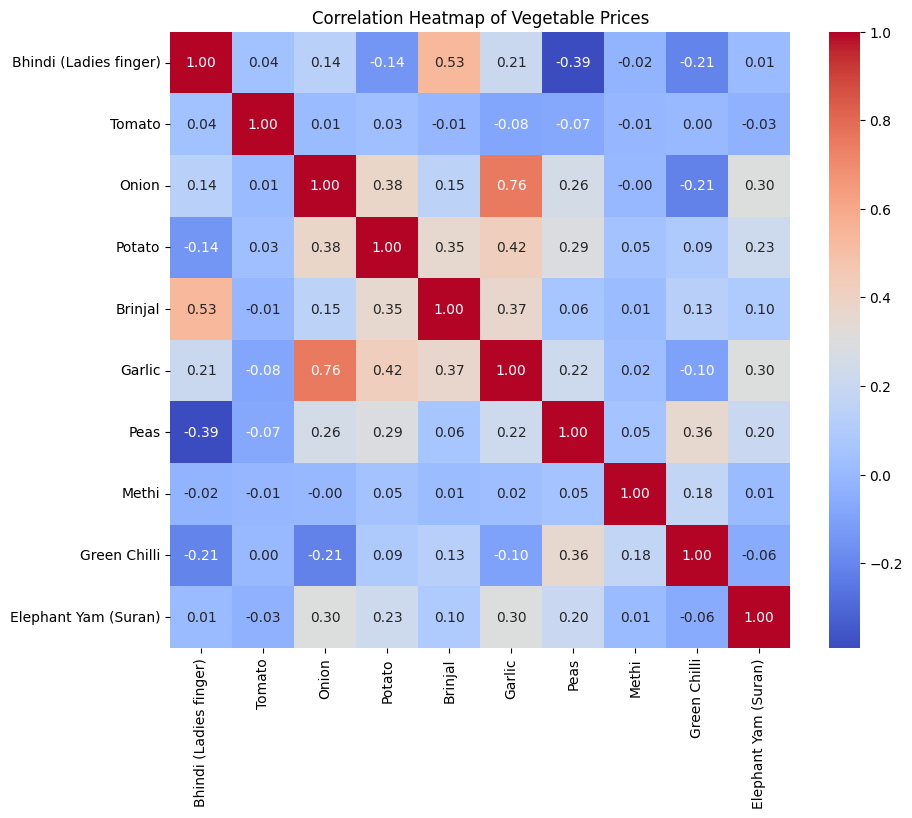

In [137]:
plt.figure(figsize=(10, 8))
sns.heatmap(vegetable_prices[price_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Vegetable Prices')
plt.show()

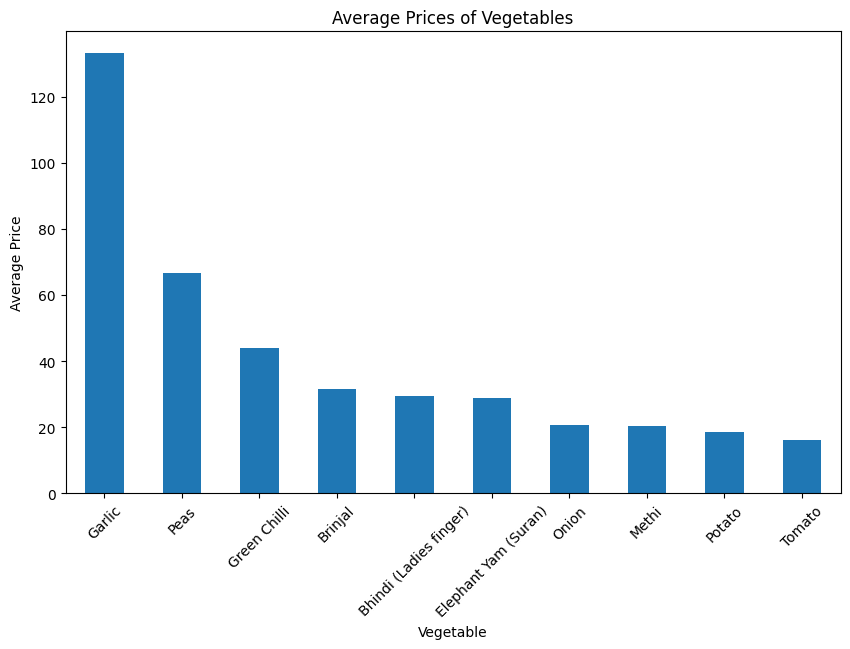

In [138]:
avg_prices = vegetable_prices[price_columns].mean().sort_values(ascending=False)
avg_prices.plot(kind='bar', figsize=(10, 6))
plt.title('Average Prices of Vegetables')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

The bar graph reveals that **Garlic**, **Peas**, and **Green Chili** are the top three most expensive vegetables, with Garlic being significantly more expensive. On the other hand, **Tomato**, **Potato**, and **Methi** are the least expensive vegetables.


**Quarterly Vegetable Price Analysis**

In this cell, we extract the quarter from the 'Price Dates' column and calculate the average prices for each vegetable by quarter. The prices are sorted and visualized using a bar graph to compare the price trends across quarters. Different colors represent each quarter, allowing for a clear comparison of seasonal price variations.


<Figure size 1600x1600 with 0 Axes>

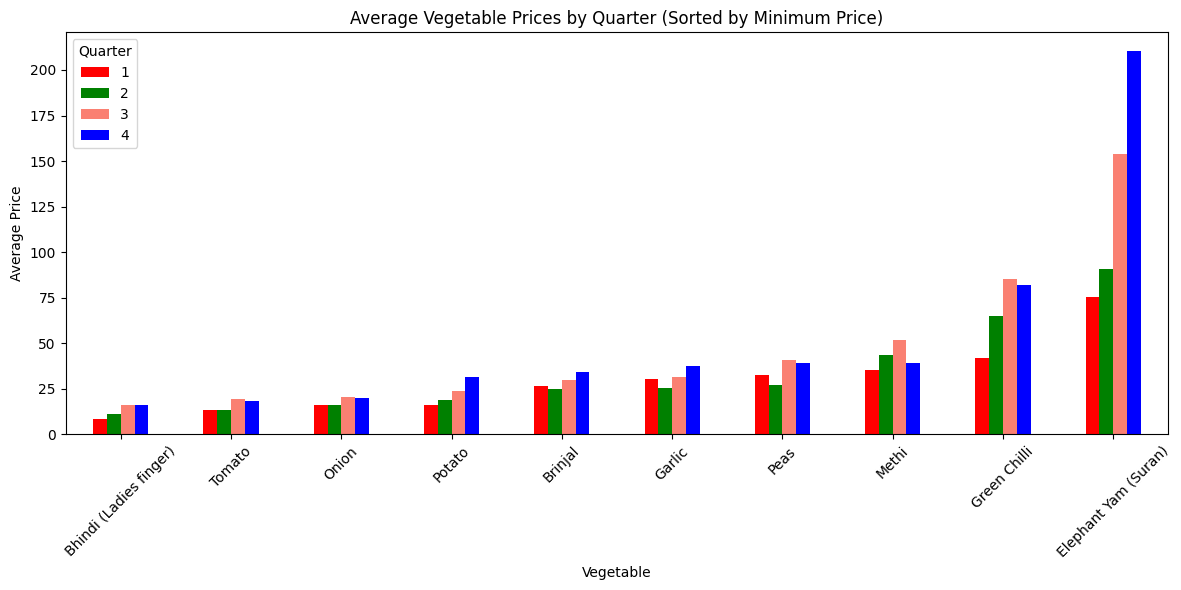

In [139]:
# Extract quarter from 'Price Dates'
vegetable_prices['Quarter'] = vegetable_prices['Price Dates'].dt.quarter

# Calculate average prices for each vegetable for each quarter
average_prices_by_quarter = vegetable_prices.groupby('Quarter')[price_columns].mean().transpose()

# Sort each vegetable's prices across quarters
sorted_average_prices = average_prices_by_quarter.apply(lambda x: x.sort_values().values)

# Create a bar graph to visualize sorted average prices by quarter
plt.figure(figsize=(16, 16))
sorted_average_prices.plot(kind='bar', figsize=(12, 6), color=['red', 'green', 'salmon', 'blue'])
plt.title('Average Vegetable Prices by Quarter (Sorted by Minimum Price)')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

 **Observations:**

The bar graph reveals several interesting trends in vegetable prices across quarters:

- **Green Chili** and **Elephant Yam** show significant price variation, with **Elephant Yam** becoming particularly expensive in Q4.
- **Tomato** prices remain relatively constant throughout the year, showing minimal fluctuation across quarters.
- Other vegetables, such as **Onion**, **Potato**, and **Brinjal**, also exhibit slight increases, but their prices don't vary as much as Green Chili and Elephant Yam.
- It’s worth investigating whether the unusually high prices of **Elephant Yam** could be due to outliers missed during the data cleaning process. To explore this possibility, a box plot is presented next to examine price distributions and identify any potential anomalies.
- Additionally, prices generally rise in Q3 and Q4, raising the question of what factors might be driving this trend later in the year.


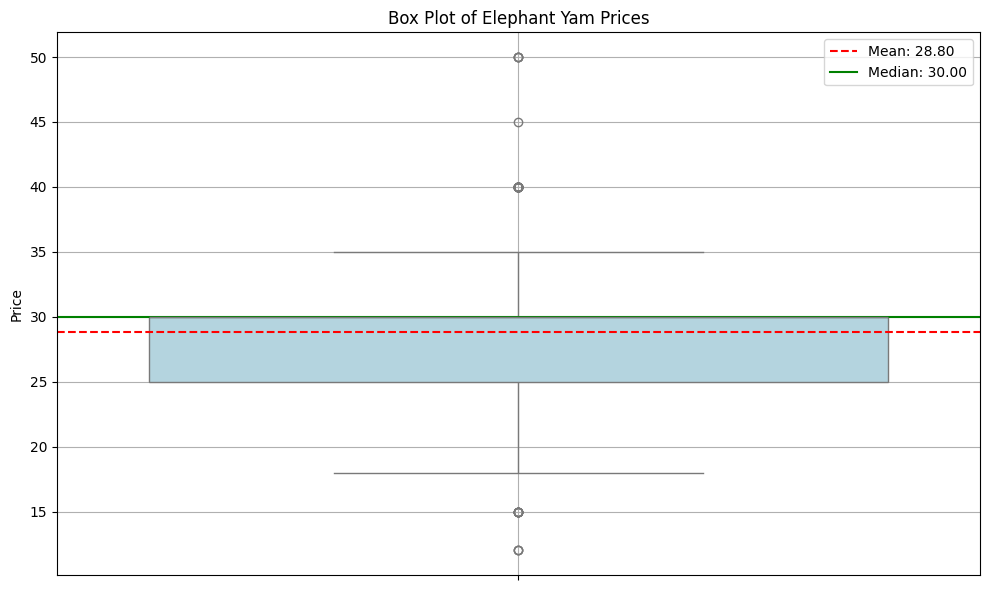

In [140]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a box plot for Elephant Yam prices
sns.boxplot(data=vegetable_prices, y='Elephant Yam (Suran)', color='lightblue')

# Calculate mean and median for Elephant Yam prices
mean_price = vegetable_prices['Elephant Yam (Suran)'].mean()
median_price = vegetable_prices['Elephant Yam (Suran)'].median()

# Plot the mean and median as horizontal lines
plt.axhline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axhline(median_price, color='green', linestyle='-', label=f'Median: {median_price:.2f}')

# Adding labels and title
plt.title('Box Plot of Elephant Yam Prices')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


**Imputing Outliers in Elephant Yam Prices**

The boxplot revealed 5 outliers in the Elephant Yam prices, with three exceeding the upper whisker and two falling below the lower whisker (Q1). To address these outliers, we imputed them with the median price. Given that only five values are affected, this imputation is unlikely to significantly alter the overall distribution of the data. This approach helps enhance the model's performance by minimizing the distortion caused by these anomalies, as shown in the code cell below.


In [141]:
# Define the column and calculate the IQR for outliers
Q1, Q3 = vegetable_prices['Elephant Yam (Suran)'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Impute outliers with the median
median_price = vegetable_prices['Elephant Yam (Suran)'].median()
vegetable_prices['Elephant Yam (Suran)'] = vegetable_prices['Elephant Yam (Suran)'].apply(
    lambda x: median_price if x < lower_bound or x > upper_bound else x
)

# Display the updated column
display(vegetable_prices['Elephant Yam (Suran)'].head())


0    25.0
1    25.0
2    25.0
3    25.0
4    25.0
Name: Elephant Yam (Suran), dtype: float64

 **Elephant Yam Price Distribution:**

The box plot illustrates the distribution of **Elephant Yam** prices, with a median price situated near the upper quartile (Q3), indicating a skewed distribution. Additionally, several outliers are identified, as shown by the dots above and below the whiskers. This further supports the earlier observation that the unusually high prices of Elephant Yam may warrant further investigation. The mean price, represented by the red dashed line, is higher than the median, reinforcing the presence of skewness and potential anomalies in the data.


**Box plot vegetable prices by quater.**

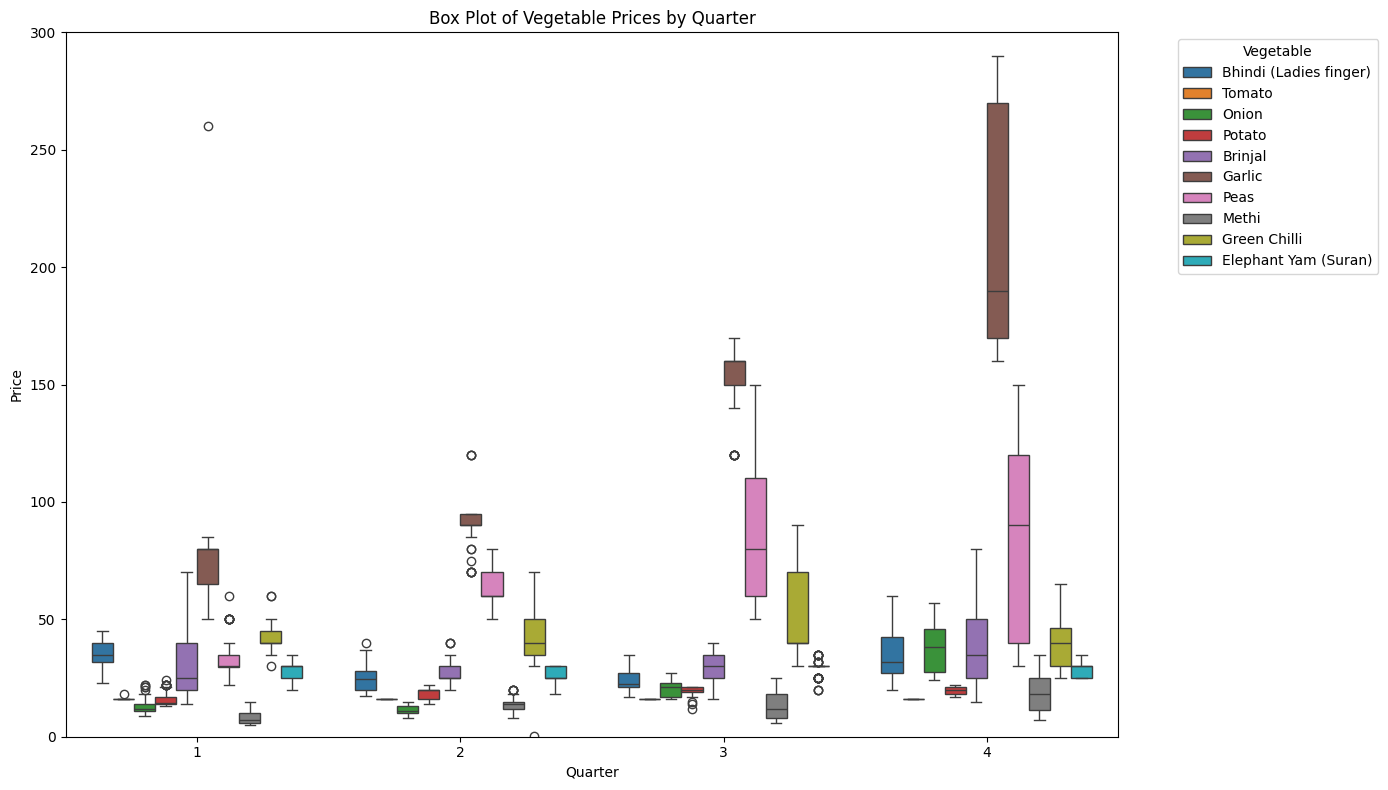

In [143]:
# Melt the DataFrame for easier plotting
melted_data = vegetable_prices.melt(id_vars=['Price Dates', 'Quarter'], var_name='Vegetable', value_name='Price')

# Create box plots for each quarter
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x='Quarter', y='Price', hue='Vegetable')
plt.title('Box Plot of Vegetable Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Price')

# Set the y-axis limit to end at 300
plt.ylim(0, 300)

# Adjust legend position
plt.legend(title='Vegetable', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Time Series Decomposition visualisations**

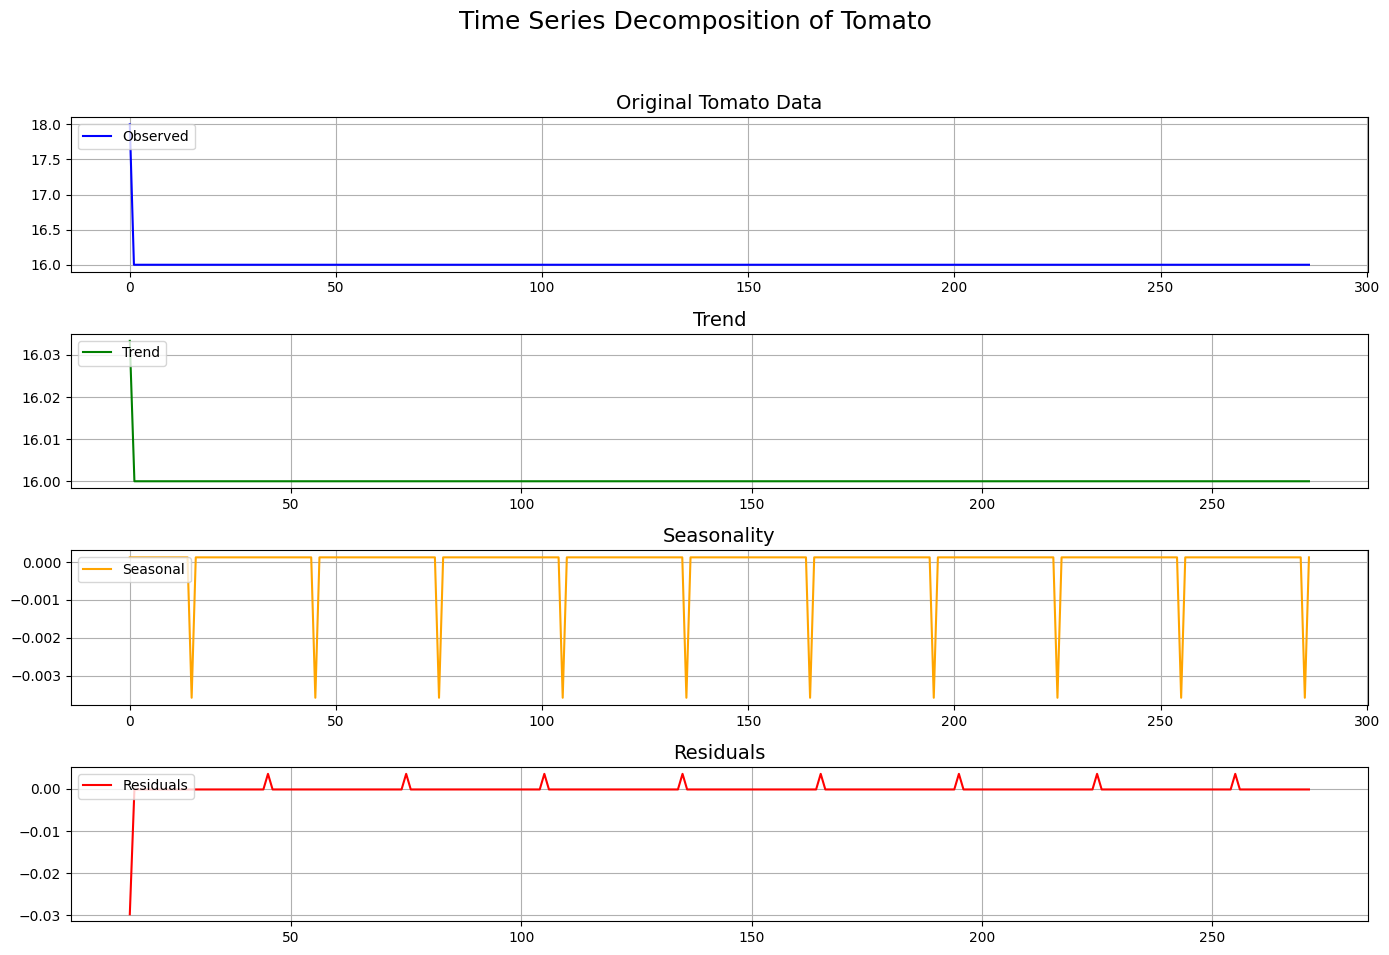

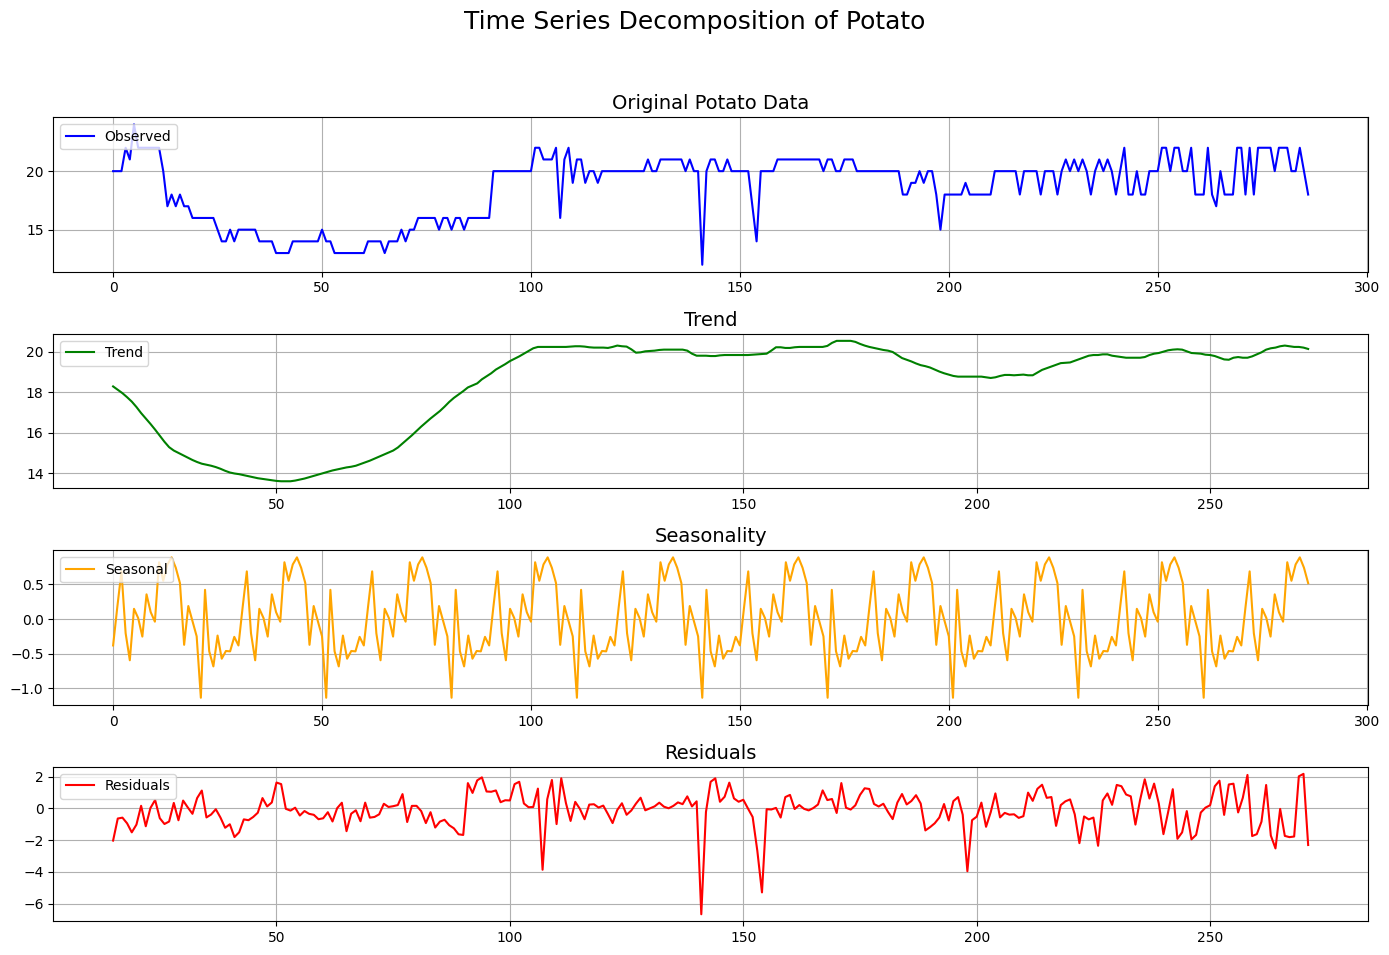

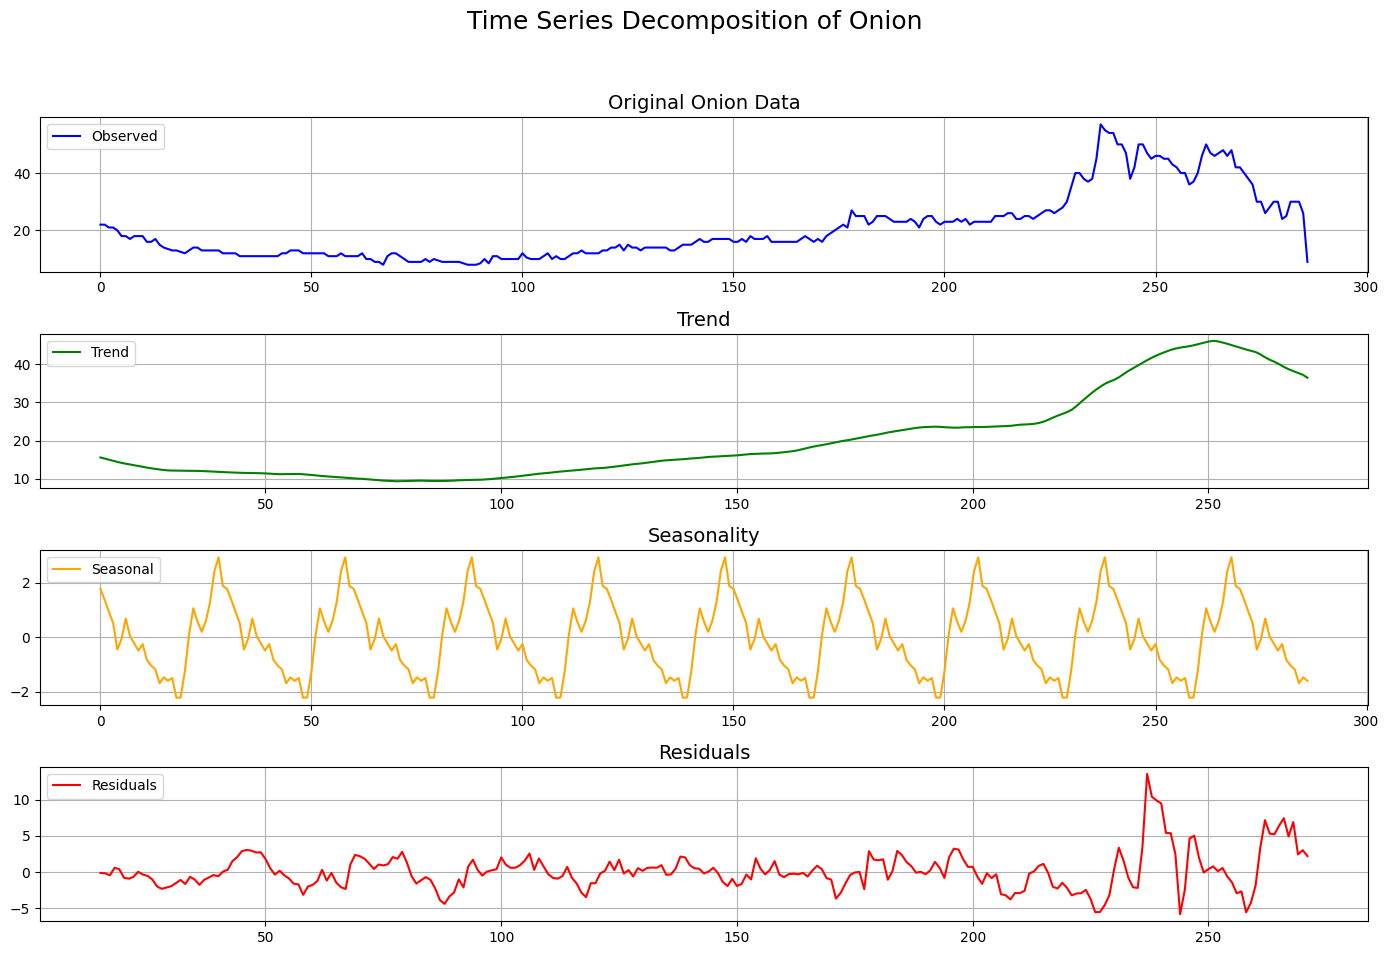

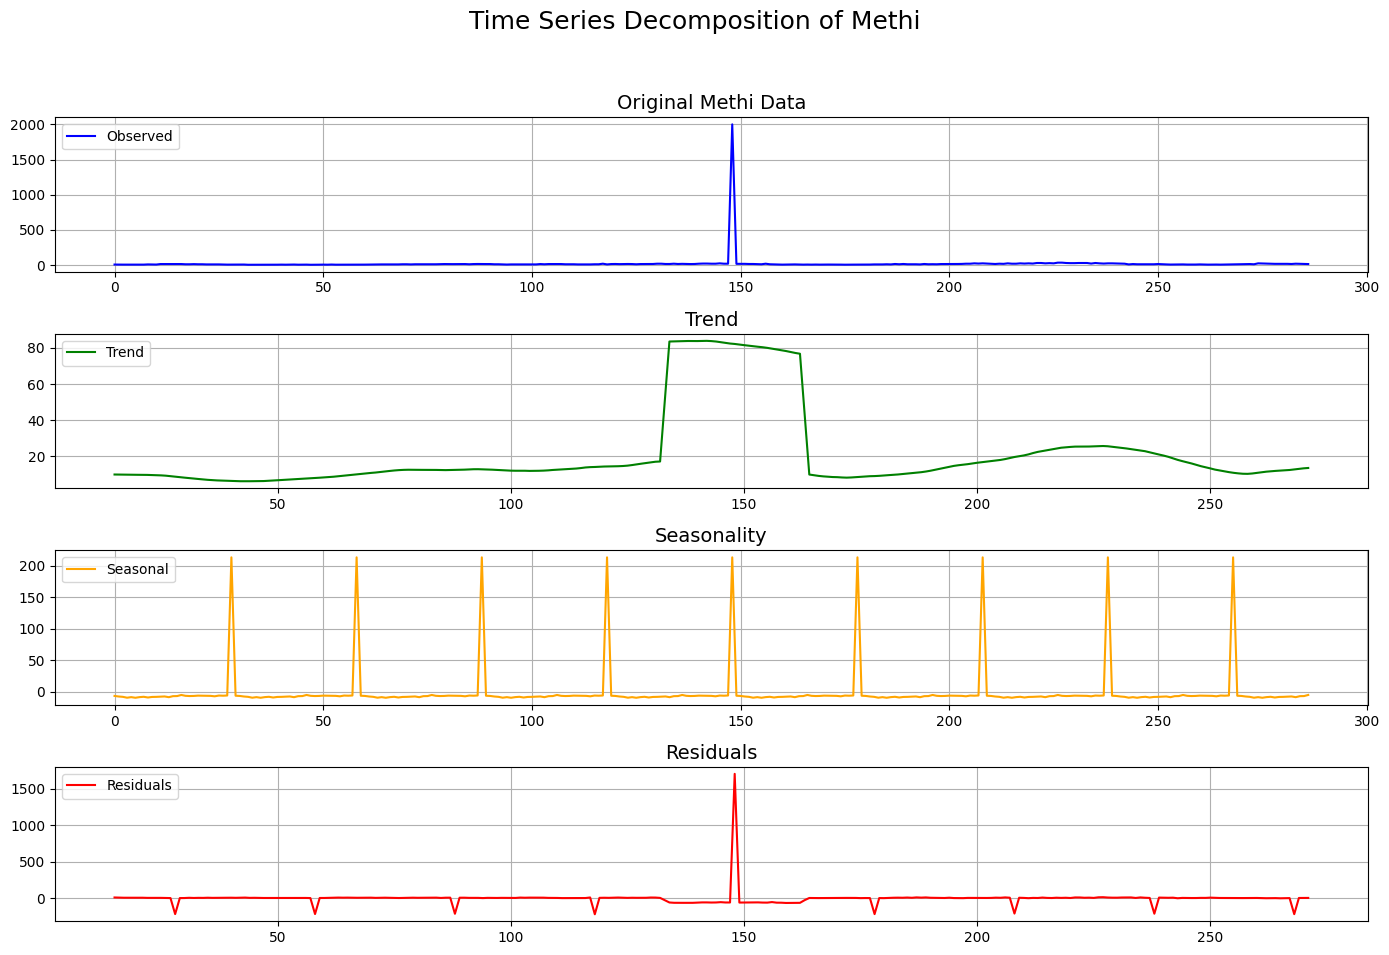

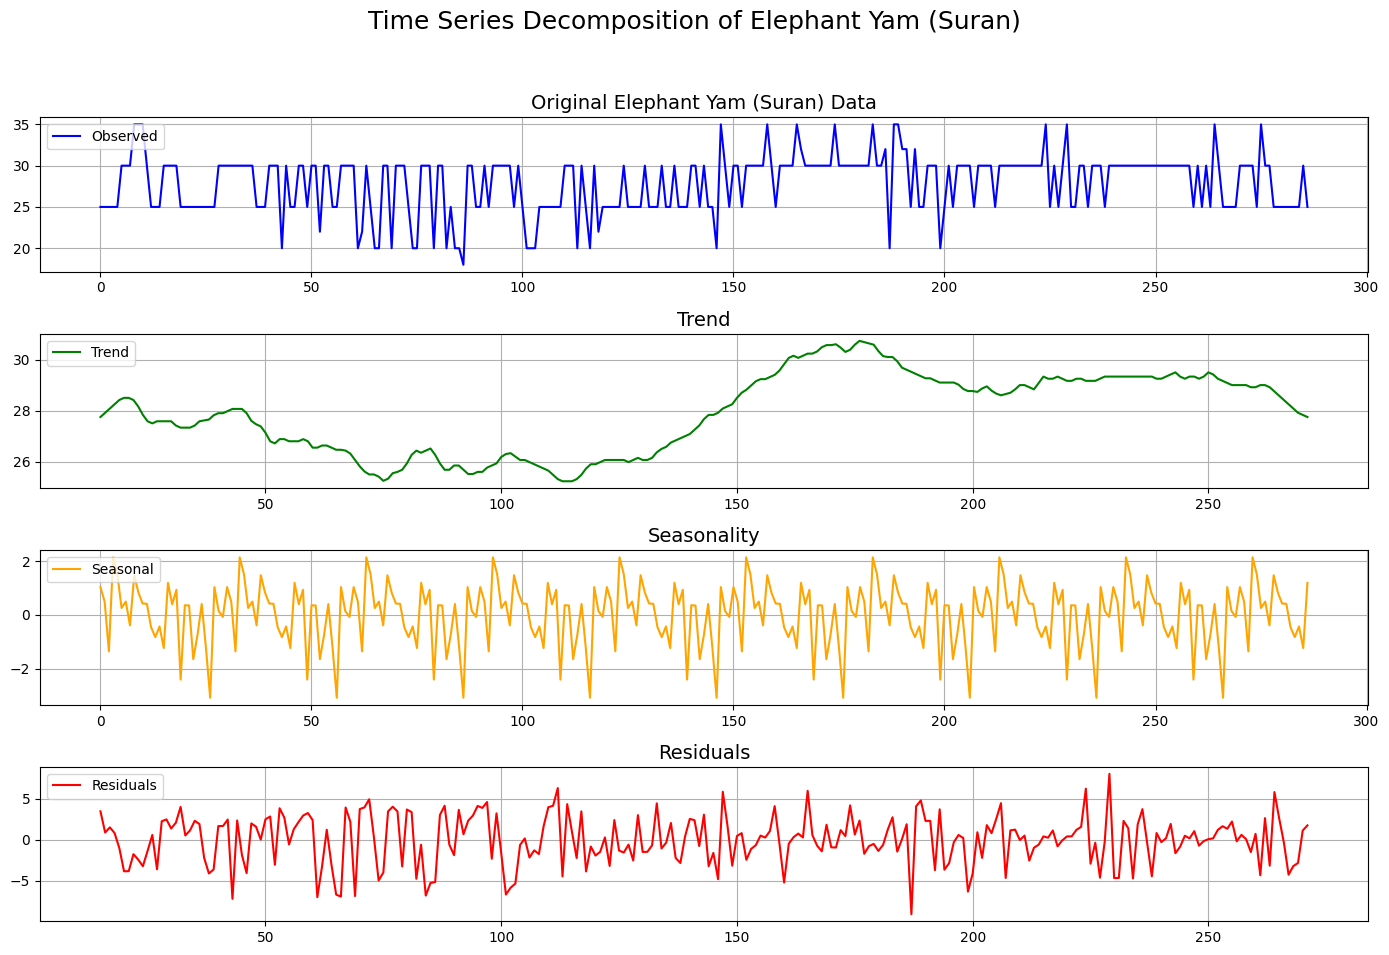

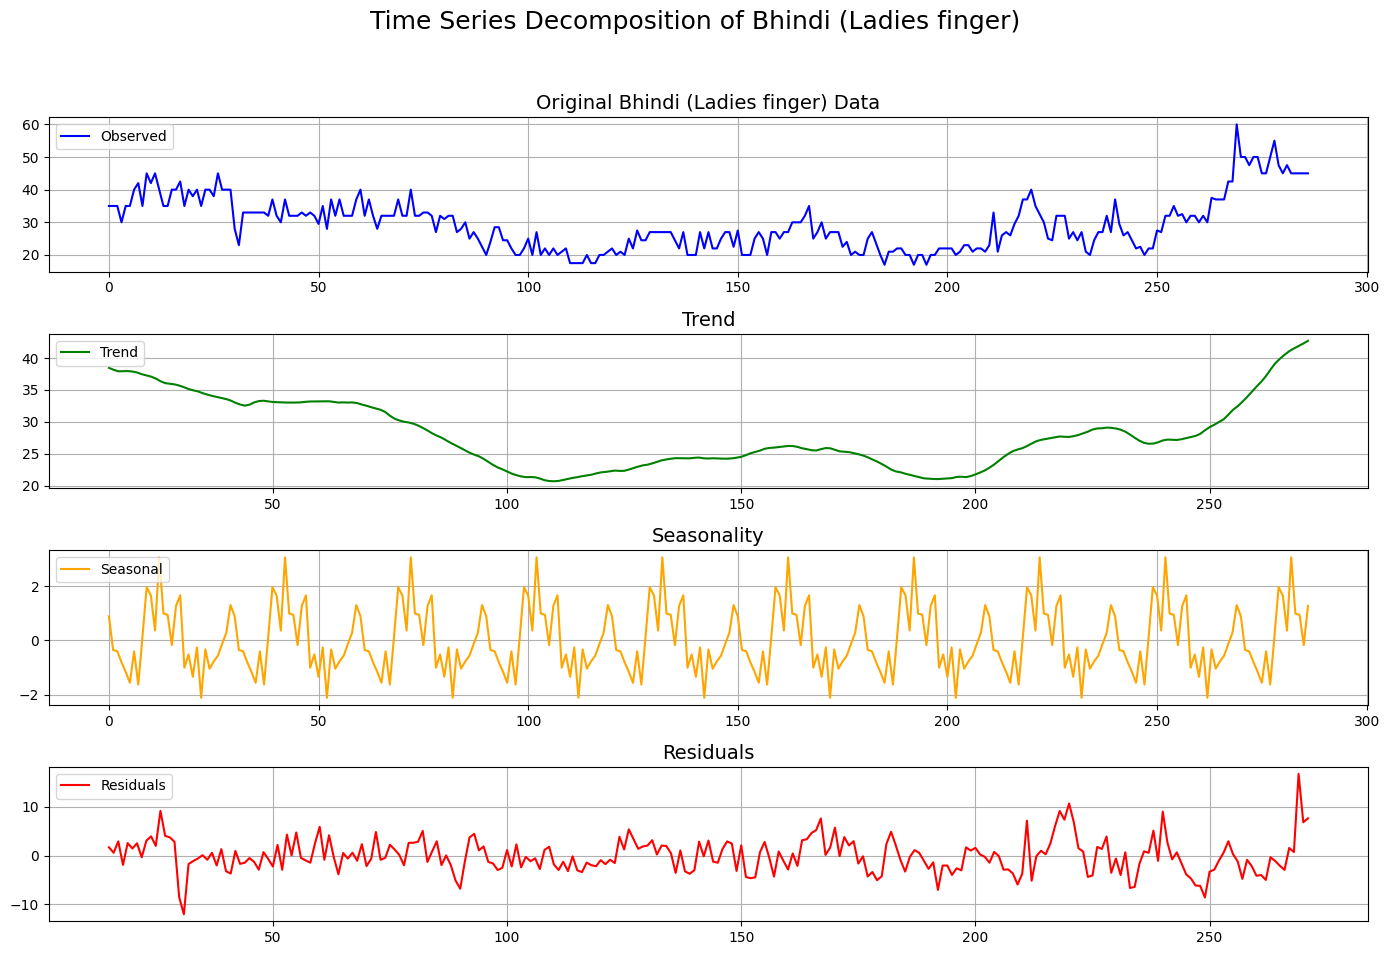

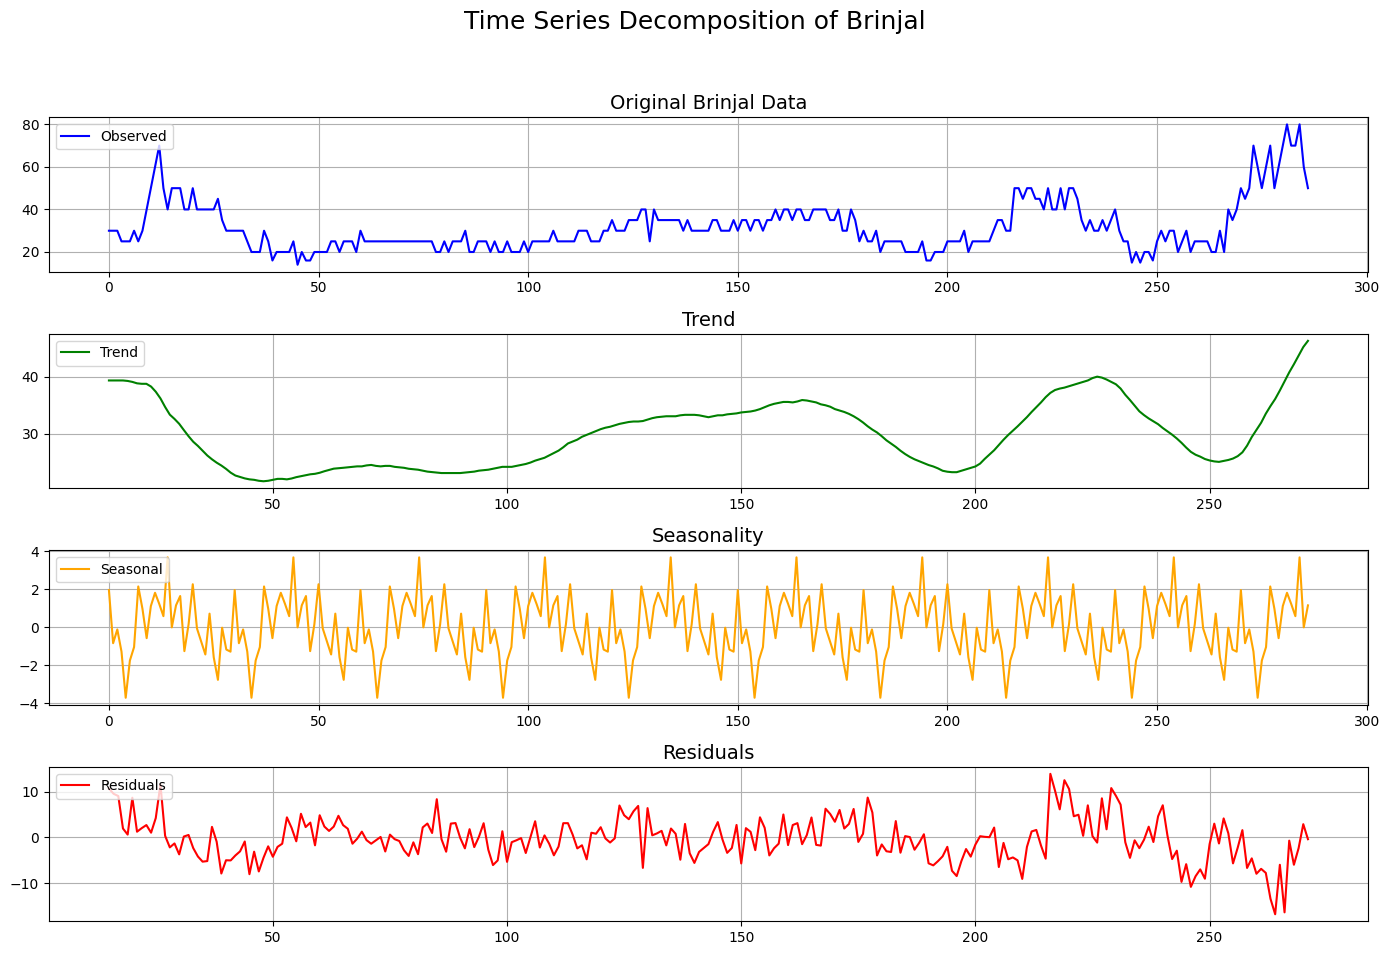

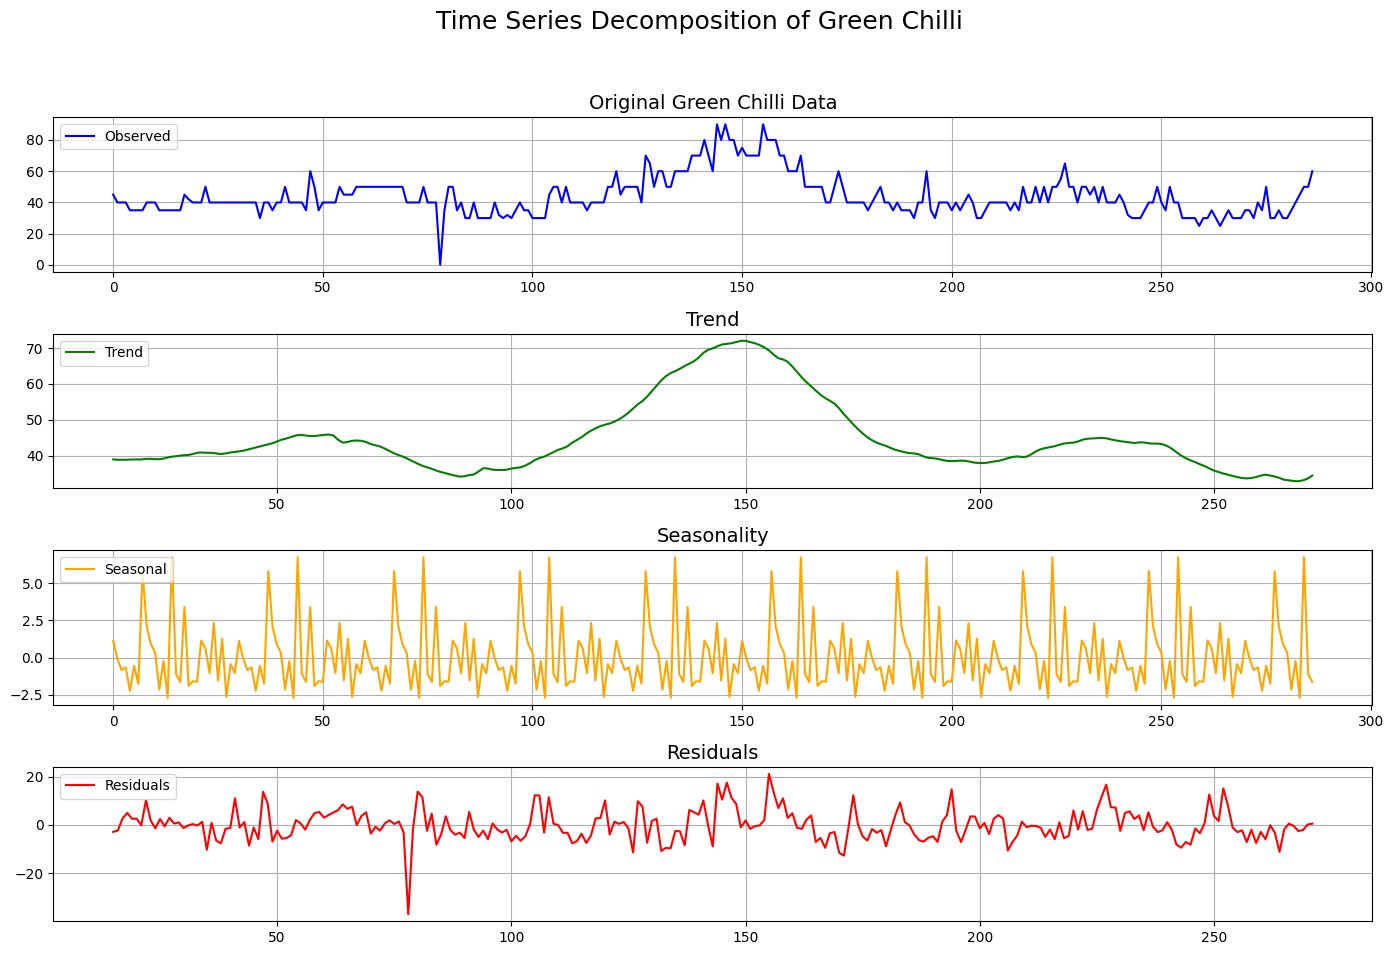

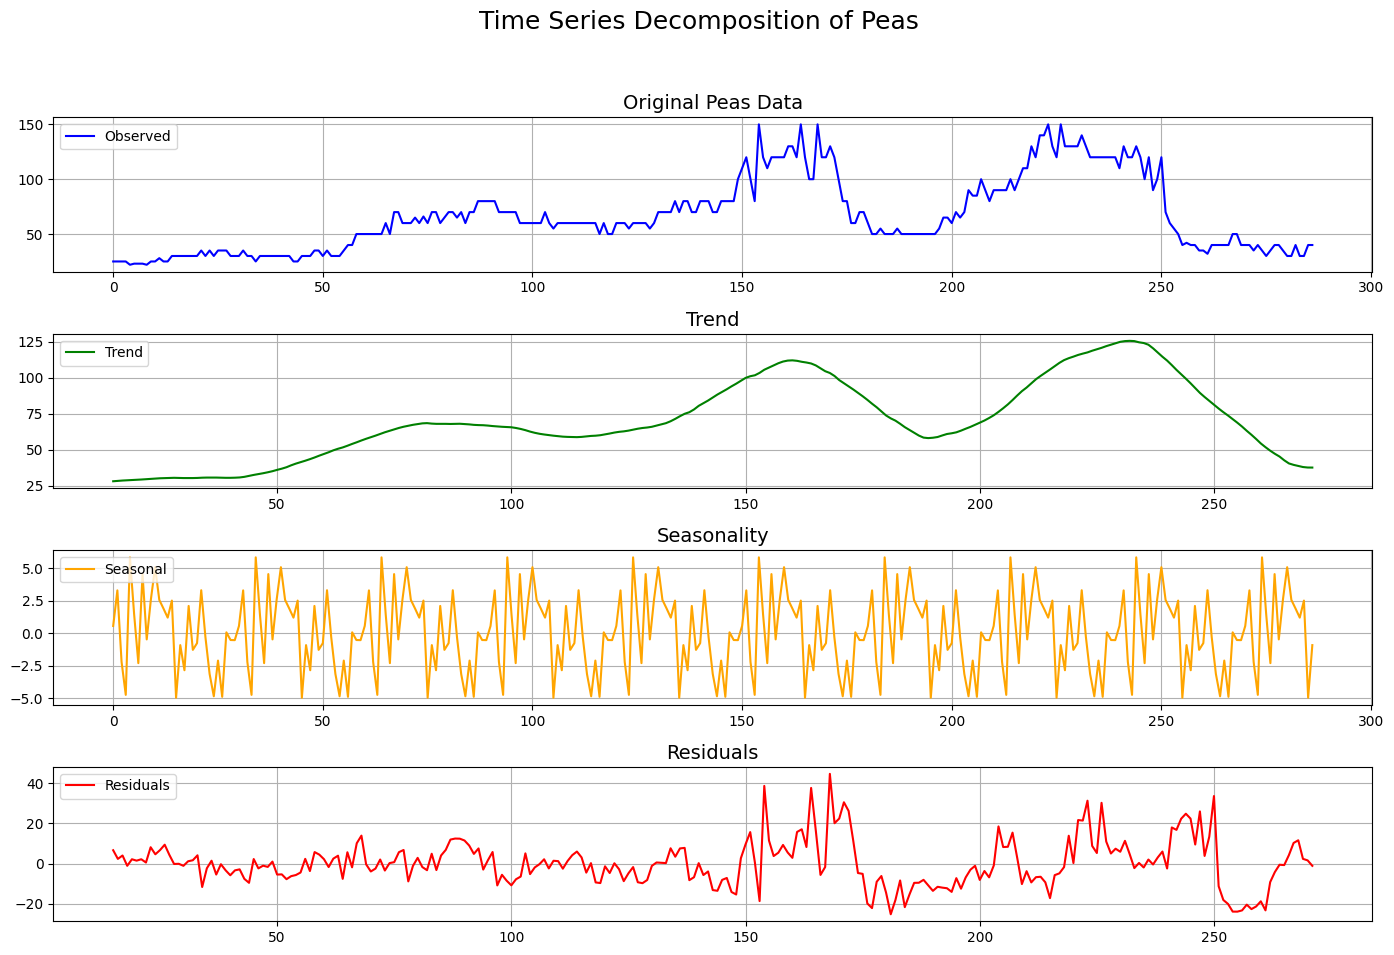

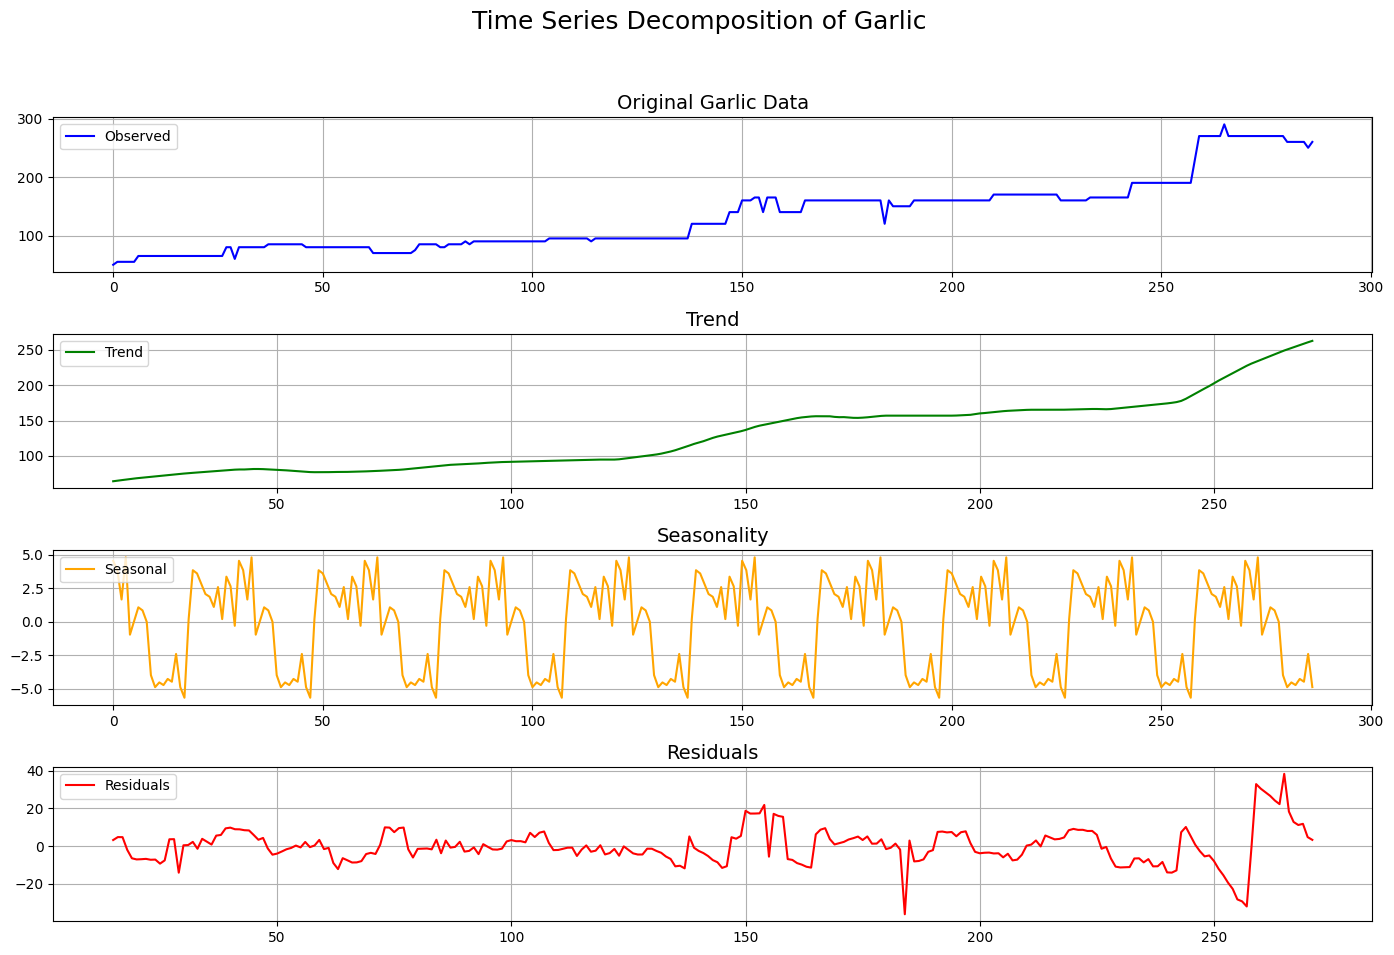

In [144]:
# Function to calculate the trend and return the mean value
def get_trend_mean(vegetable_name):
    decomposition = seasonal_decompose(vegetable_prices[vegetable_name], model='additive', period=30)
    return decomposition.trend.mean()

# Calculate the trend mean for each vegetable
trend_means = {vegetable: get_trend_mean(vegetable) for vegetable in vegetable_prices.columns if vegetable not in ['Price Dates', 'Quarter', 'Year']}

# Sort vegetables by trend mean (ascending)
sorted_vegetables = sorted(trend_means, key=trend_means.get)

# Define a function to decompose and plot the time series for each vegetable
def decompose_and_plot(vegetable_name):
    decomposition = seasonal_decompose(vegetable_prices[vegetable_name], model='additive', period=30)
    
    # Create subplots
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))

    # Plot original data
    ax1.plot(decomposition.observed, label='Observed', color='blue')
    ax1.set_title(f'Original {vegetable_name} Data', fontsize=14)
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Plot trend
    ax2.plot(decomposition.trend, label='Trend', color='green')
    ax2.set_title('Trend', fontsize=14)
    ax2.legend(loc='upper left')
    ax2.grid(True)

    # Plot seasonal component
    ax3.plot(decomposition.seasonal, label='Seasonal', color='orange')
    ax3.set_title('Seasonality', fontsize=14)
    ax3.legend(loc='upper left')
    ax3.grid(True)

    # Plot residuals
    ax4.plot(decomposition.resid, label='Residuals', color='red')
    ax4.set_title('Residuals', fontsize=14)
    ax4.legend(loc='upper left')
    ax4.grid(True)

    # Add a super title for all subplots
    plt.suptitle(f'Time Series Decomposition of {vegetable_name}', fontsize=18)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

# Now proceed with the decomposition and plotting for each vegetable in sorted order
for vegetable in sorted_vegetables:
    decompose_and_plot(vegetable)


**How to Read the Plots for Each Vegetable**

- **Observed**: The original time series data itself.
- **Trend**: The long-term upward or downward movement in the data over time.
- **Seasonality**: Regular fluctuations or patterns that repeat over a fixed period (e.g., monthly, yearly).
- **Residual**: What's left after removing the trend and seasonality, representing noise or irregularities in the data.

The vegetable plots are sorted by their trend mean average in ascending order, with the vegetable having the highest average at the top. However, this sorting does not necessarily reflect the current state of the trend, as a vegetable may show a declining trend after having remained at the top for an extended period. For example, we can observe that the Elephant Yam is the last visual due to the lowest average trend; however, the trend line is clearly going up, and anyone can see that without any struggle.




**Visusalising the vegetable prices over time with an average moving window**

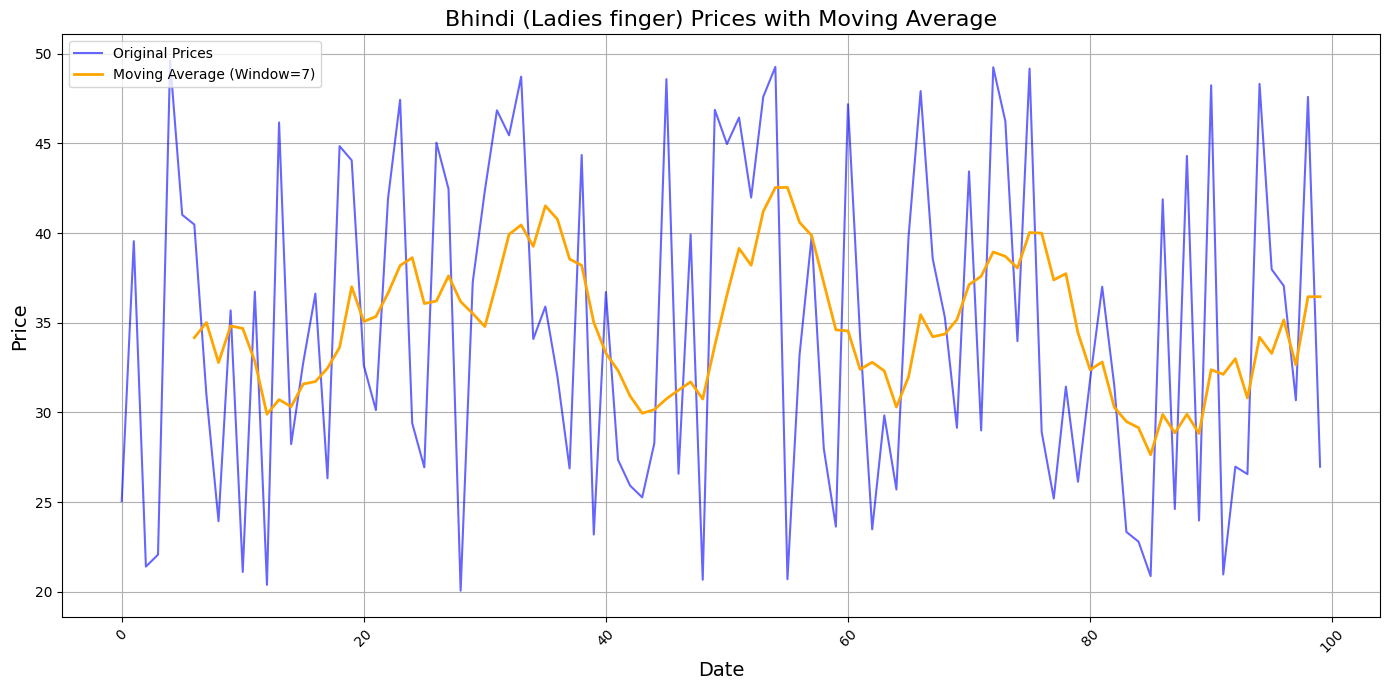

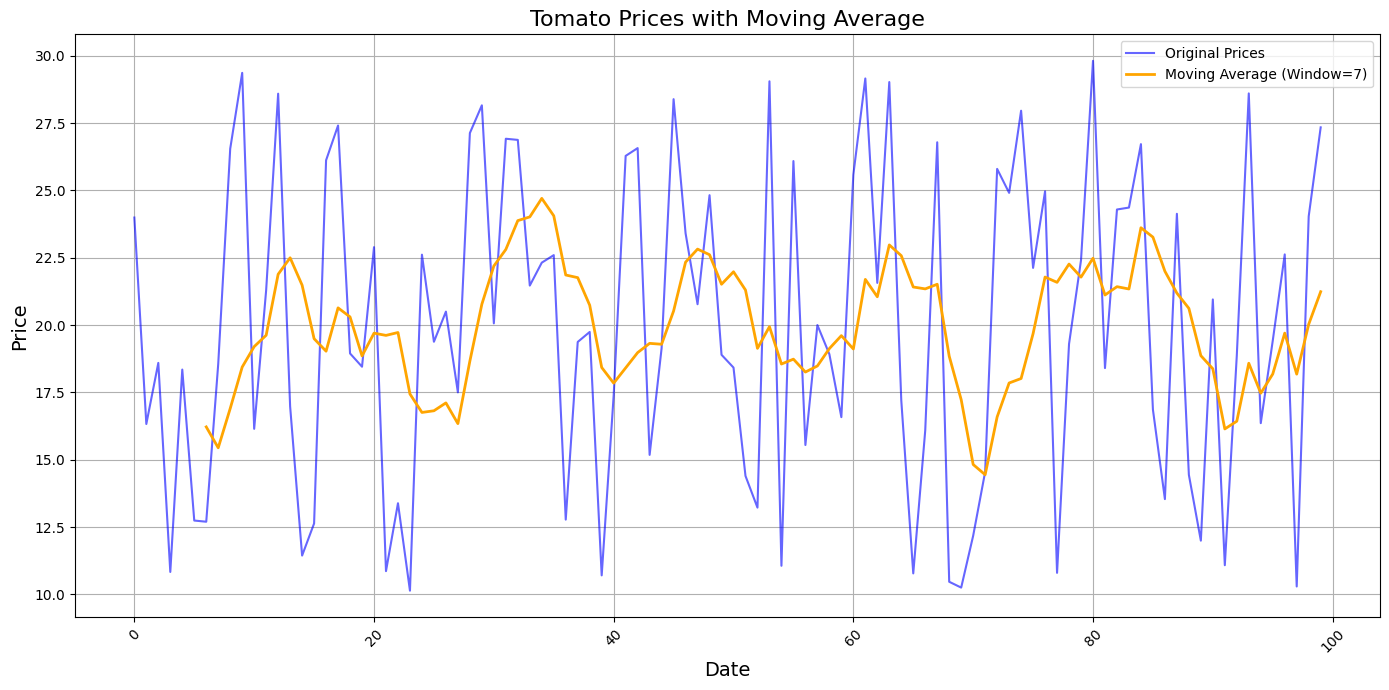

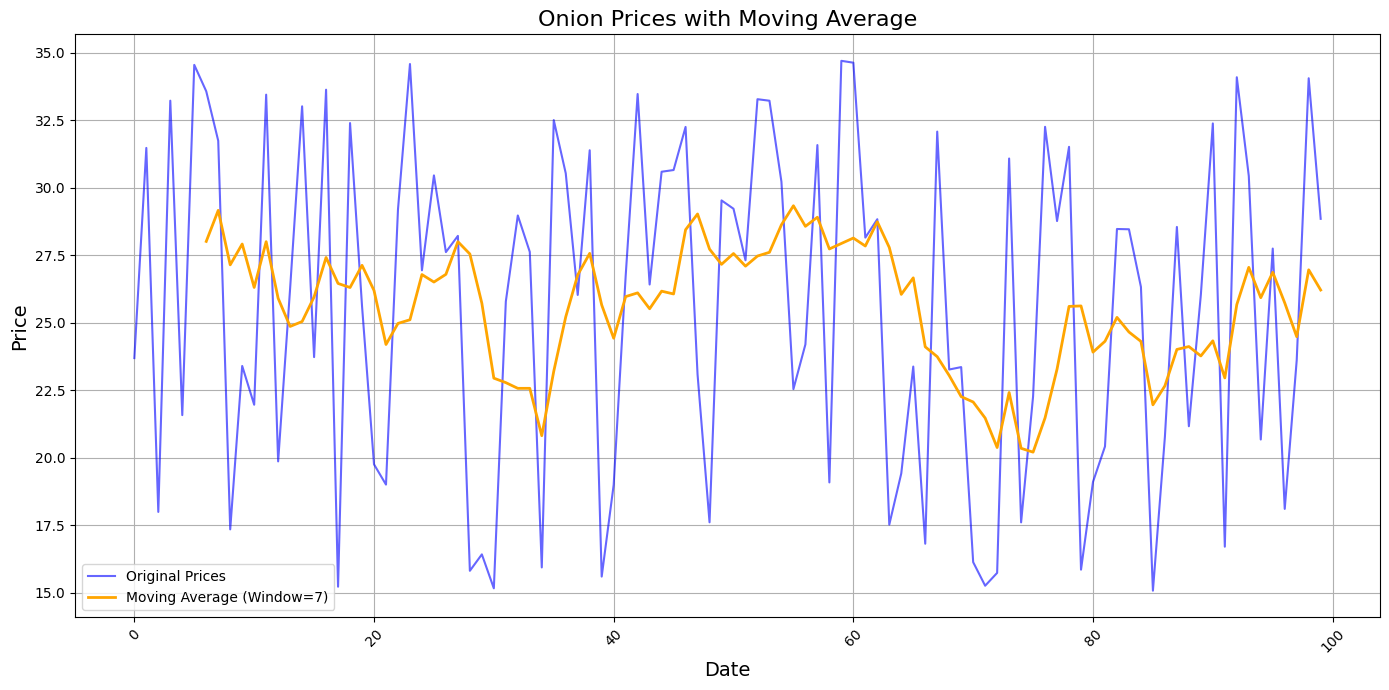

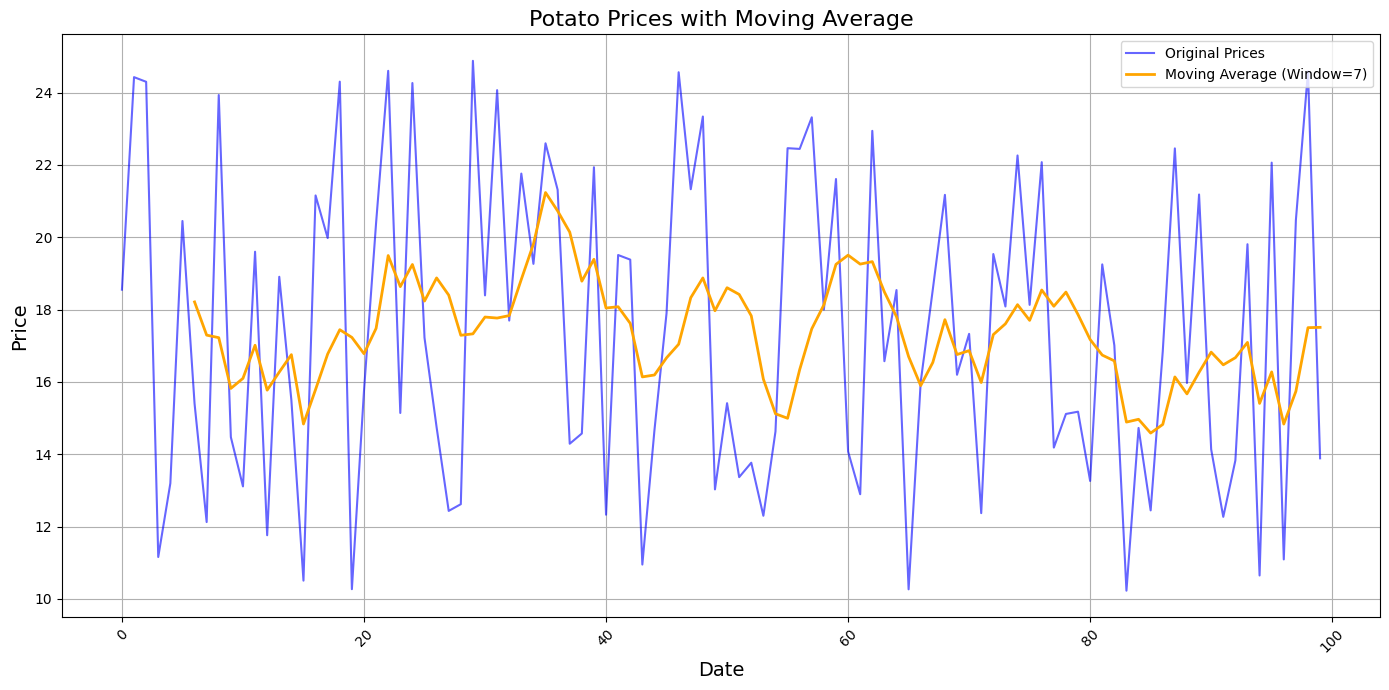

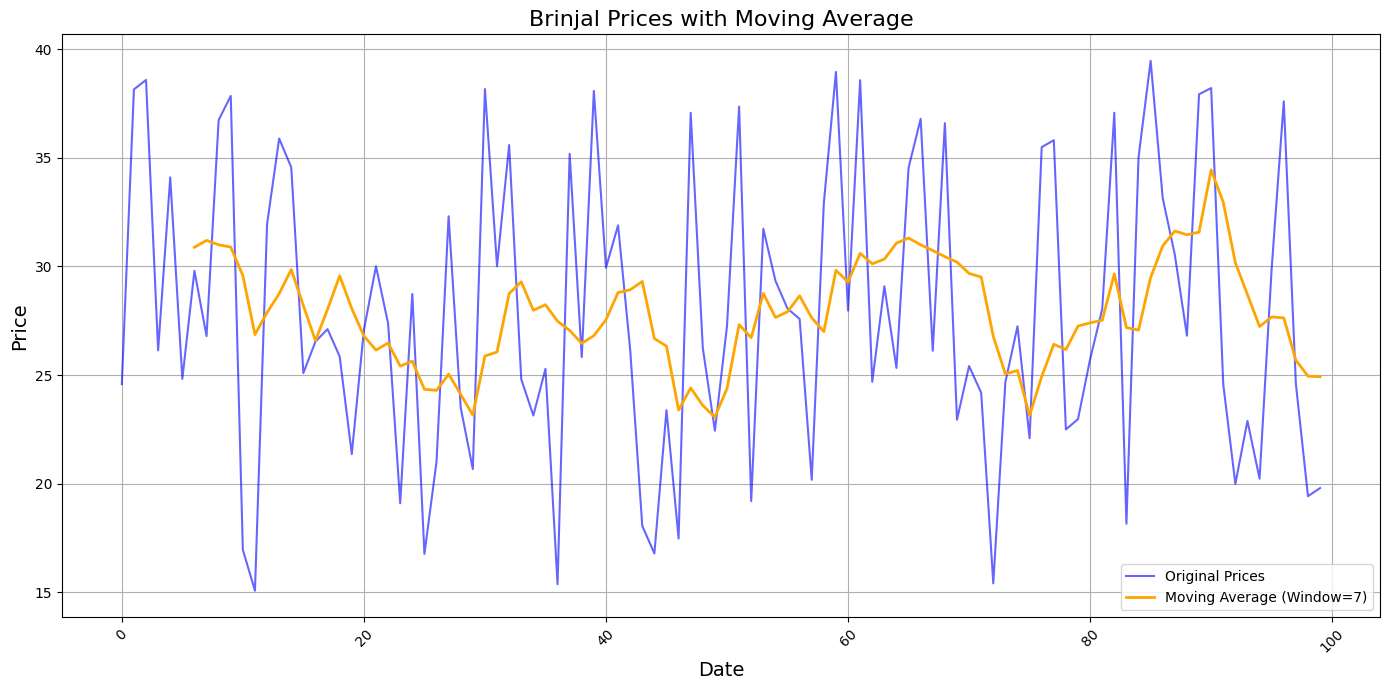

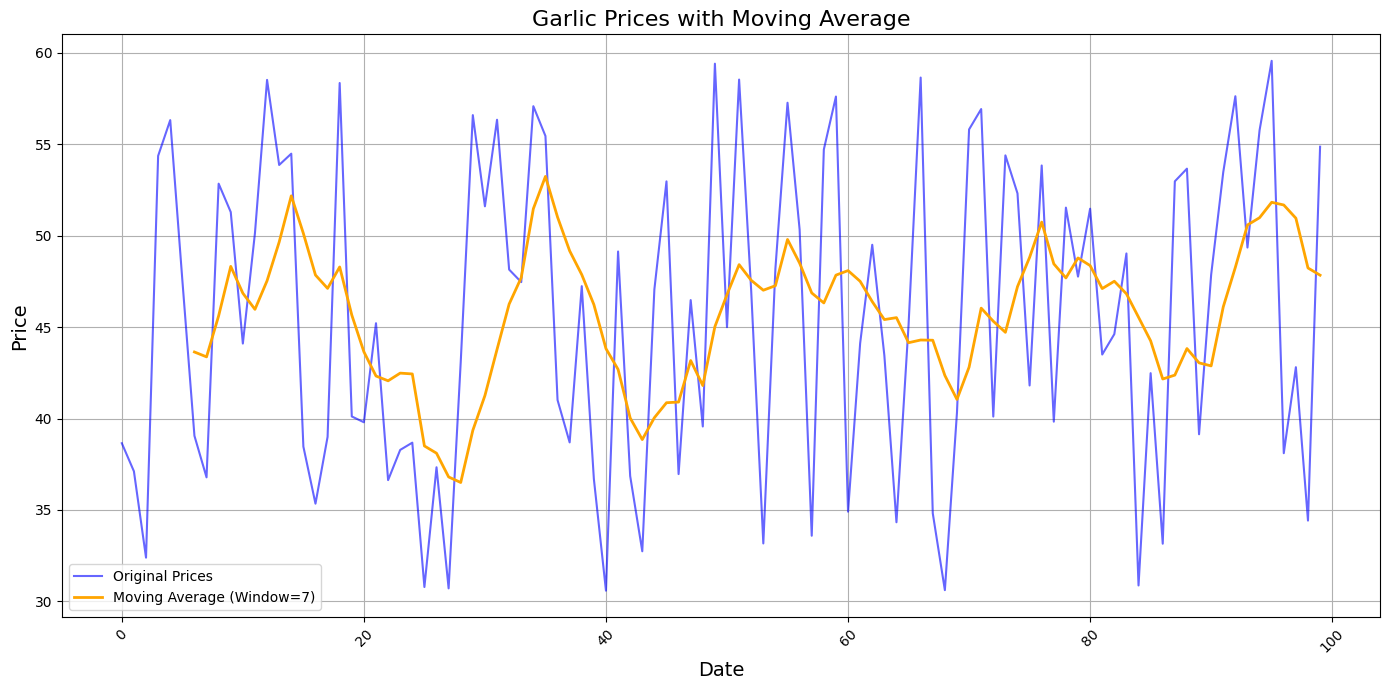

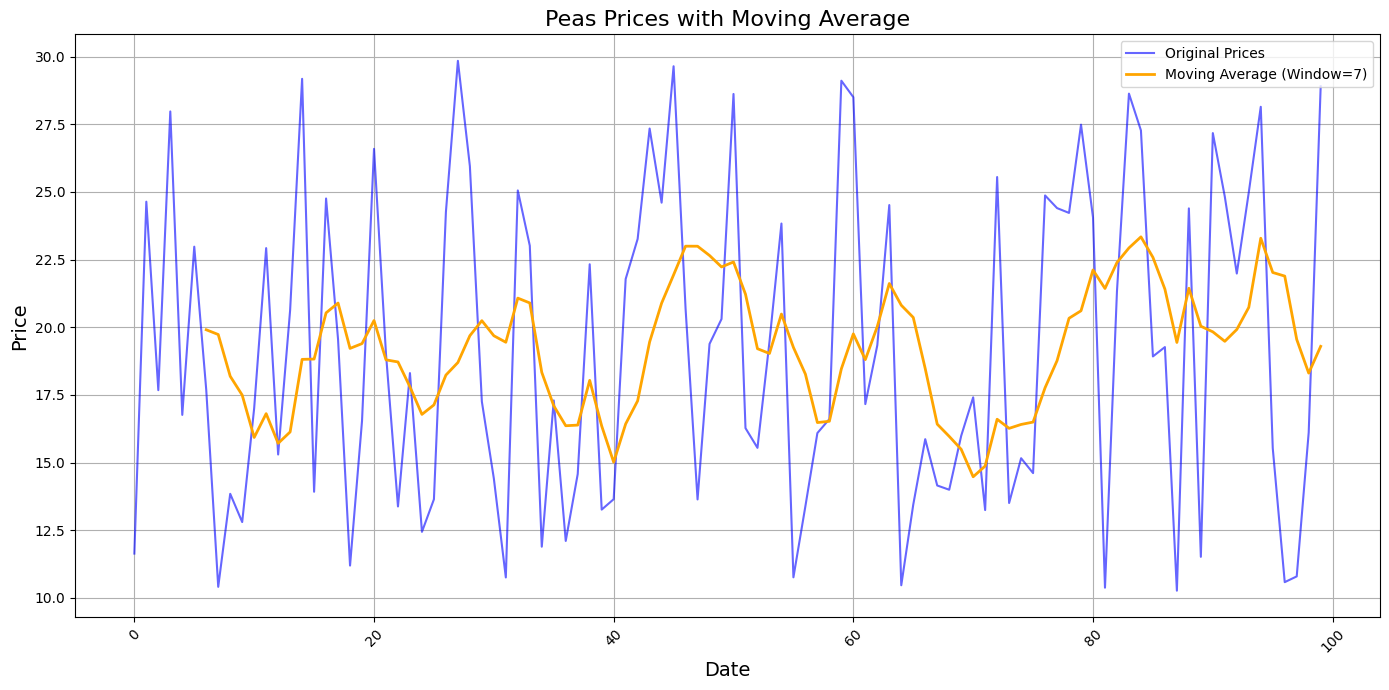

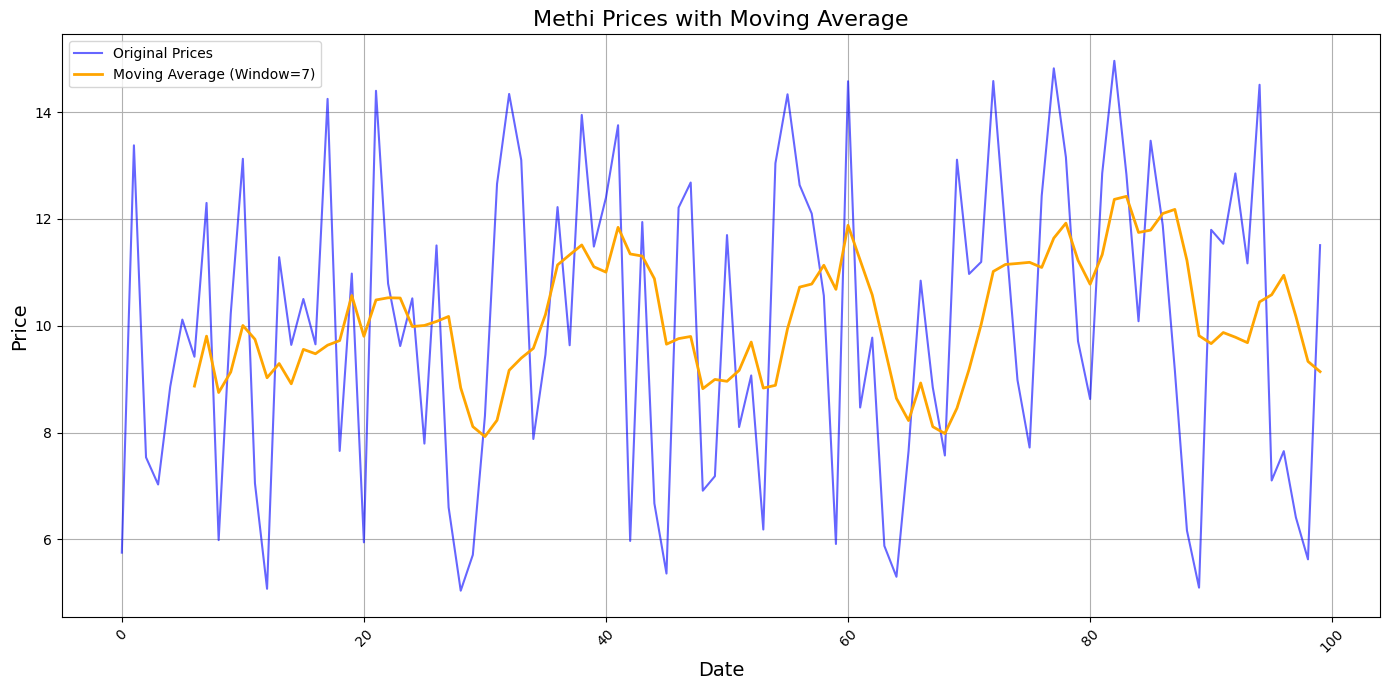

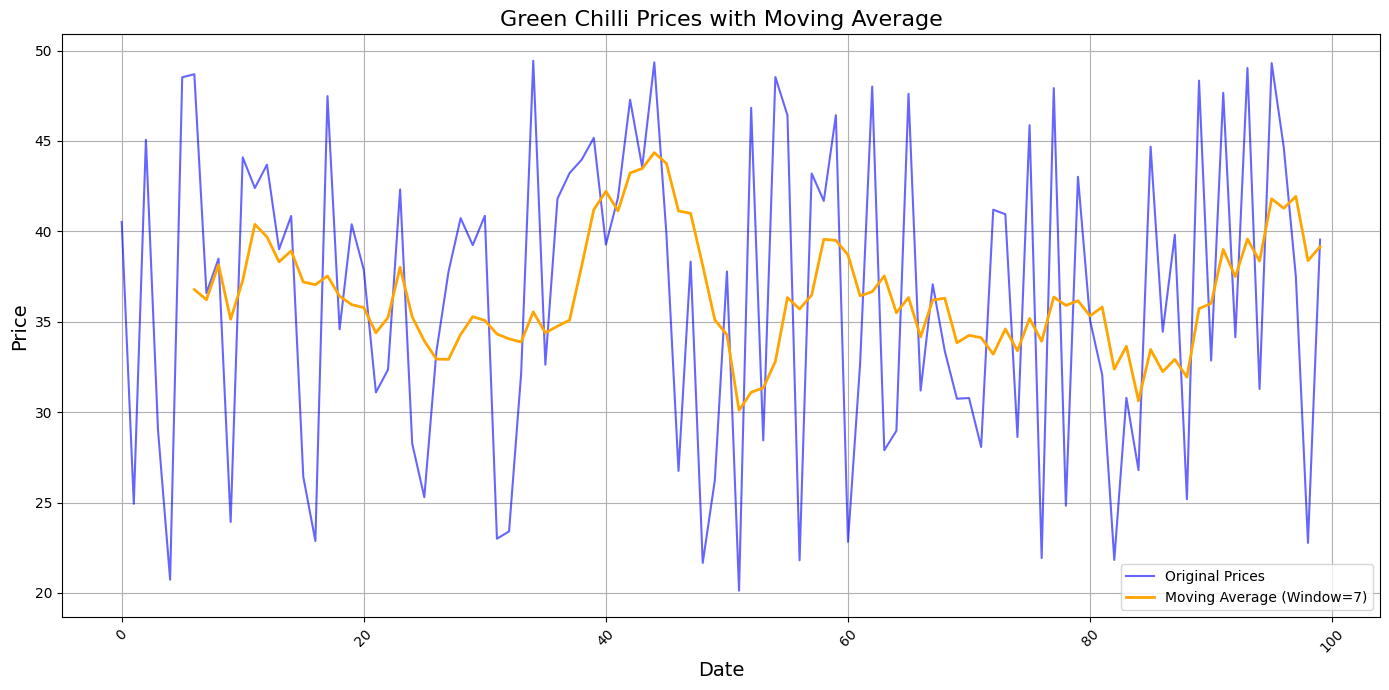

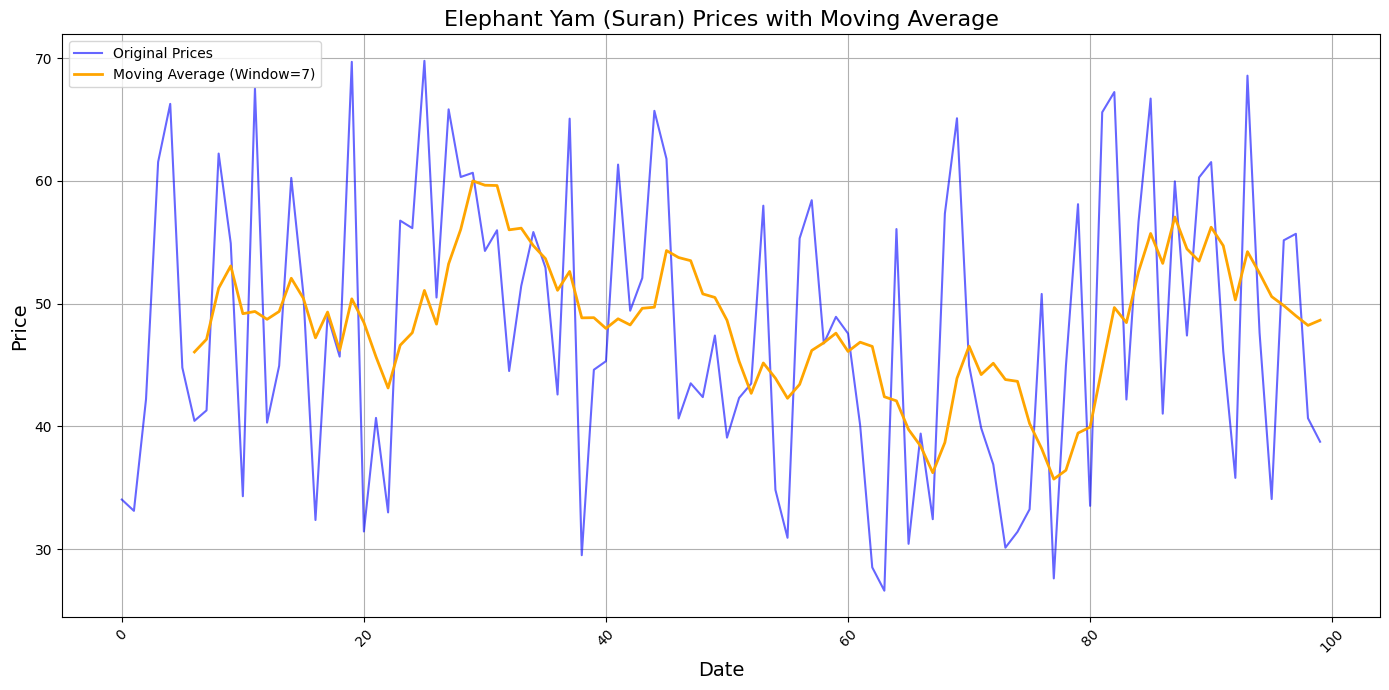

In [89]:

def plot_with_moving_average(vegetable_name, window=7):
    plt.figure(figsize=(14, 7))
    
    # Plot the original prices
    plt.plot(vegetable_prices[vegetable_name], label='Original Prices', color='blue', alpha=0.6)

    # Calculate and plot the moving average
    moving_average = vegetable_prices[vegetable_name].rolling(window=window).mean()
    plt.plot(moving_average, label=f'Moving Average (Window={window})', color='orange', linewidth=2)

    # Formatting the plot
    plt.title(f'{vegetable_name} Prices with Moving Average', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# List of vegetables to plot
vegetables_to_plot = list(vegetable_prices.columns)

# Loop through each vegetable and create the plot with moving average
for vegetable in vegetables_to_plot:
    if vegetable not in ['Price Dates', 'Year', 'Quarter']:  # Ensure only to plot vegetables
        plot_with_moving_average(vegetable)


The visuals of the graphs show the blue lines fluctuating above and below the yellow line, indicating the impact of seasonal changes as prices move in relation to the moving average.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
def prepare_data_for_modeling(data, target_variable, test_size=0.2, random_state=42):
    """
    Prepares the dataset for modeling by isolating the target variable and splitting into training and test sets.
    
    Parameters:
    - data: DataFrame containing the cleaned dataset.
    - target_variable: The name of the target variable column as a string.
    - test_size: Proportion of the dataset to include in the test split (default is 0.2).
    - random_state: Random seed for reproducibility (default is 42).
    
    Returns:
    - X_train: Features for training.
    - y_train: Target variable for training.
    - X_test: Features for testing.
    - y_test: Target variable for testing.
    """
    
    # Isolate features and target variable
    X = data.drop(columns=[target_variable])  # Features
    y = data[target_variable]  # Target variable
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, y_train, X_test, y_test

# Replace 'Target_Variable_Name' with the actual name of your target variable
#X_train, y_train, X_test, y_test = prepare_data_for_modeling(vegetable_prices, 'Elephant Yam (Suran)')

In [78]:
vegetable_prices.head() 

Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  2023-01-01                    35.0    18.0   22.0    20.0     30.0    50.0   
1  2023-01-02                    35.0    16.0   22.0    20.0     30.0    55.0   
2  2023-01-03                    35.0    16.0   21.0    20.0     30.0    55.0   
3  2023-01-04                    30.0    16.0   21.0    22.0     25.0    55.0   
4  2023-01-08                    35.0    16.0   20.0    21.0     25.0    55.0   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  Quarter  
0  25.0    8.0          45.0                  25.0        1  
1  25.0    7.0          40.0                  25.0        1  
2  25.0    7.0          40.0                  25.0        1  
3  25.0    7.0          40.0                  25.0        1  
4  22.0    6.0          35.0                  25.0        1

In [ ]:

def preprocess_vegetable_prices(vegetable_prices):
    # Step 1: Reset index if it's already set
    if vegetable_prices.index.name == 'Price Dates':
        vegetable_prices = vegetable_prices.reset_index()
    
    # Step 2: Convert 'Price Dates' to datetime format
    vegetable_prices['Price Dates'] = pd.to_datetime(vegetable_prices['Price Dates'])
    
    # Step 3: Set 'Price Dates' as the index
    vegetable_prices.set_index('Price Dates', inplace=True)
    
    # Step 4: Extract time-based features
    vegetable_prices['Month'] = vegetable_prices.index.month
    vegetable_prices['Quarter'] = vegetable_prices.index.quarter
    vegetable_prices['Day_of_week'] = vegetable_prices.index.dayofweek
    vegetable_prices['Year'] = vegetable_prices.index.year
    
    return vegetable_prices

# Assuming 'vegetable_prices' is the dataframe
processed_vegetable_prices = preprocess_vegetable_prices(vegetable_prices)
display(processed_vegetable_prices.head())


Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
Price Dates                                                                   
2023-01-01                     35.0    18.0   22.0    20.0     30.0    50.0   
2023-01-02                     35.0    16.0   22.0    20.0     30.0    55.0   
2023-01-03                     35.0    16.0   21.0    20.0     30.0    55.0   
2023-01-04                     30.0    16.0   21.0    22.0     25.0    55.0   
2023-01-08                     35.0    16.0   20.0    21.0     25.0    55.0   

             Peas  Methi  Green Chilli  Elephant Yam (Suran)  Quarter  Month  \
Price Dates                                                                    
2023-01-01   25.0    8.0          45.0                  25.0        1      1   
2023-01-02   25.0    7.0          40.0                  25.0        1      1   
2023-01-03   25.0    7.0          40.0                  25.0        1      1   
2023-01-04   25.0    7.0          40.0                  25.0        1      1   
2023-01-08   22.0    6.0          35.0                  25.0        1      1   

             Day_of_week  Year  
Price Dates                     
2023-01-01             6  2023  
2023-01-02             0  2023  
2023-01-03             1  2023  
2023-01-04             2  2023  
2023-01-08             6  2023

In [ ]:

def walk_forward_cv(df, vegetable_column, param_grid, test_size=0.2):
    """
    Walk-forward cross-validation for time series forecasting with SARIMA.

    Parameters:
    df (pd.DataFrame): Preprocessed dataframe with vegetable prices.
    vegetable_column (str): The column name for the vegetable.
    param_grid (dict): Dictionary of parameter grids for hyperparameter tuning.
    test_size (float): The proportion of the data to use for testing (default is 0.2 for 20% test size).
    
    Returns:
    tuple: (best_model, best_aic, all_metrics)
    """
    # Extract the vegetable price time series
    ts = df[vegetable_column]

    # Split the data into train and test
    train_size = int(len(ts) * (1 - test_size))
    train, test = ts[:train_size], ts[train_size:]

    best_aic = float('inf')
    best_model = None
    best_order = None
    best_seasonal_order = None
    best_trend = None
    all_metrics = []

    # Grid search for the best model based on AIC
    for order in param_grid['order']:
        for seasonal_order in param_grid['seasonal_order']:
            for trend in param_grid['trend']:
                try:
                    # Include the trend parameter
                    model = SARIMAX(train,
                                    order=order,
                                    seasonal_order=seasonal_order,
                                    trend=trend,
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False)
                    results = model.fit(disp=False)
                    aic = results.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_model = results
                        best_order = order
                        best_seasonal_order = seasonal_order
                        best_trend = trend
                    
                    # Forecast and calculate evaluation metrics
                    forecast = best_model.get_forecast(steps=len(test))
                    forecast_series = pd.Series(forecast.predicted_mean.values, index=test.index)
                    
                    # Calculate evaluation metrics
                    mae = mean_absolute_error(test, forecast_series)
                    mse = mean_squared_error(test, forecast_series)
                    rmse = np.sqrt(mse)
                    r2 = r2_score(test, forecast_series)
                    mape = np.mean(np.abs((test - forecast_series) / test))  # Mean Absolute Percentage Error
                    smape = 2 * np.mean(np.abs(forecast_series - test) / (np.abs(forecast_series) + np.abs(test)))

                    all_metrics.append({
                        'order': order,
                        'seasonal_order': seasonal_order,
                        'trend': trend,
                        'MAE': mae,
                        'MSE': mse,
                        'RMSE': rmse,
                        'R2': r2,
                        'MAPE': mape,
                        'SMAPE': smape
                    })

                except Exception as e:
                    print(f"Error with parameters order={order}, seasonal_order={seasonal_order}, trend={trend}: {e}")
                    continue
    
    # Get the best model based on AIC
    print(f"Best Model AIC: {best_aic}")
    print(f"Best Order: {best_order}")
    print(f"Best Seasonal Order: {best_seasonal_order}")
    print(f"Best Trend: {best_trend}")

    return best_model, all_metrics

def forecast_vegetable_price_with_advanced_evaluation_v2(df, vegetable_column, param_grid, steps=12, test_size=0.2):
    """
    Forecast the price of a vegetable using SARIMA with walk-forward cross-validation and hyperparameter tuning.

    Parameters:
    df (pd.DataFrame): Preprocessed dataframe with vegetable prices.
    vegetable_column (str): The column name for the vegetable.
    param_grid (dict): Dictionary of parameter grids for hyperparameter tuning.
    steps (int): The number of steps to forecast ahead.
    test_size (float): The proportion of the data to use for testing (default is 0.2 for 20% test size).
    
    Returns:
    pd.Series: Forecasted prices for the next 'steps' periods.
    """
    # Perform walk-forward CV to get the best model
    best_model, all_metrics = walk_forward_cv(df, vegetable_column, param_grid, test_size)

    # Forecast the next 'steps' periods with the best model
    forecast = best_model.get_forecast(steps=steps)
    forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=steps, freq='D')
    forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index, name=vegetable_column)

    # Plot the historical data, training data, and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(df[vegetable_column], label='Historical Prices')
    plt.plot(forecast_series, label=f'Forecasted {vegetable_column}', color='orange')
    plt.title(f'Price Forecast for {vegetable_column}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Print evaluation metrics for the best model
    print("Evaluation metrics for best model:")
    for metric in all_metrics:
        if metric['order'] == best_model.specification['order'] and \
           metric['seasonal_order'] == best_model.specification['seasonal_order'] and \
           metric['trend'] == best_model.specification['trend']:
            print(metric)
    
    return forecast_series

# Example of parameter grid (adjust according to your needs)
param_grid = {
    'order': [(1, 1, 1), (2, 1, 1), (1, 1, 2)],
    'seasonal_order': [(1, 1, 1, 4), (1, 0, 1, 4), (2, 1, 2, 4)],
    'trend': ['n', 'c', 't', 'ct']  # 'n' = no trend, 'c' = constant trend, 't' = linear trend, 'ct' = constant + linear trend
}


In [113]:
vegetable_prices.columns

Index(['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal',
       'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)',
       'Quarter', 'Month', 'Day_of_week', 'Year'],
      dtype='object')

Generating forecast for Bhindi (Ladies finger)...
Best Model AIC: 1137.8201538628018
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


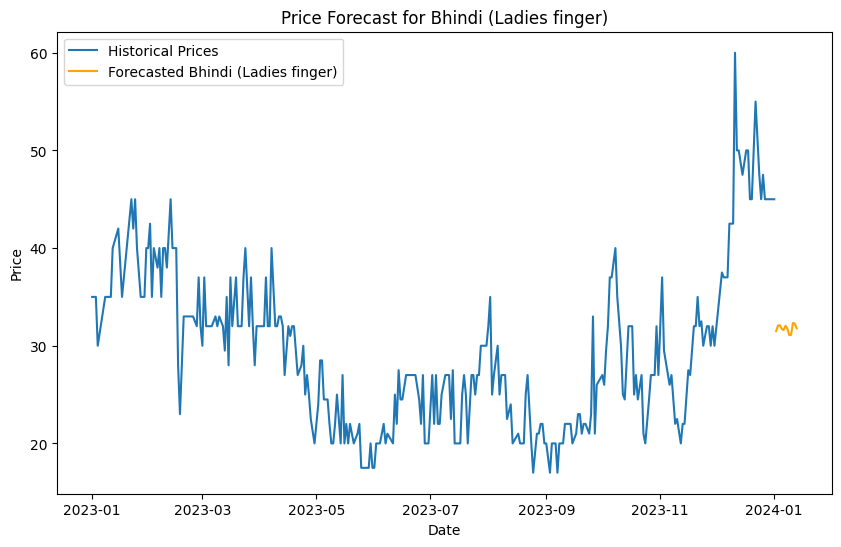

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(8.114579577553613), 'MSE': np.float64(99.11574414365901), 'RMSE': np.float64(9.955689034097992), 'R2': 0.05006545388967365, 'MAPE': np.float64(0.23030991448285726), 'SMAPE': np.float64(0.23136158667056514)}
Generating forecast for Tomato...
Best Model AIC: -5714.894940368005
Best Order: (1, 1, 1)
Best Seasonal Order: (1, 0, 1, 4)
Best Trend: n


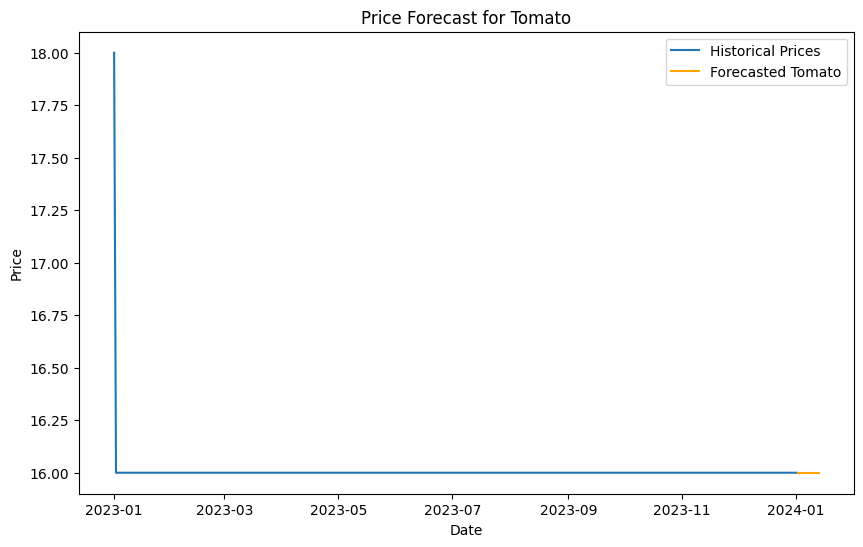

Evaluation metrics for best model:
{'order': (1, 1, 1), 'seasonal_order': (1, 0, 1, 4), 'trend': 'n', 'MAE': np.float64(0.0), 'MSE': np.float64(0.0), 'RMSE': np.float64(0.0), 'R2': 1.0, 'MAPE': np.float64(0.0), 'SMAPE': np.float64(0.0)}
Generating forecast for Onion...
Best Model AIC: 625.470852960548
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: c


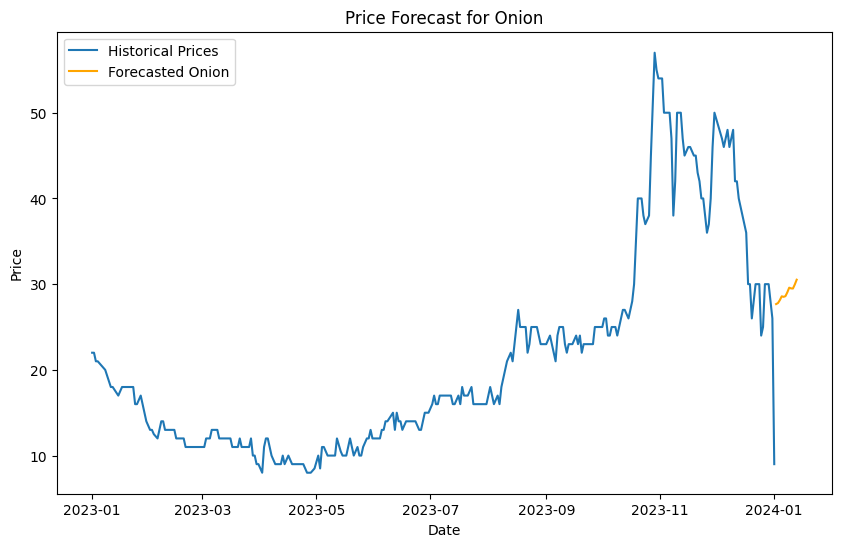

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'c', 'MAE': np.float64(11.808013974160025), 'MSE': np.float64(183.56551052266929), 'RMSE': np.float64(13.548635005884146), 'R2': -1.1713187857714575, 'MAPE': np.float64(0.3473641979049248), 'SMAPE': np.float64(0.3174020366702144)}
Generating forecast for Potato...
Best Model AIC: 705.4283874519923
Best Order: (2, 1, 1)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


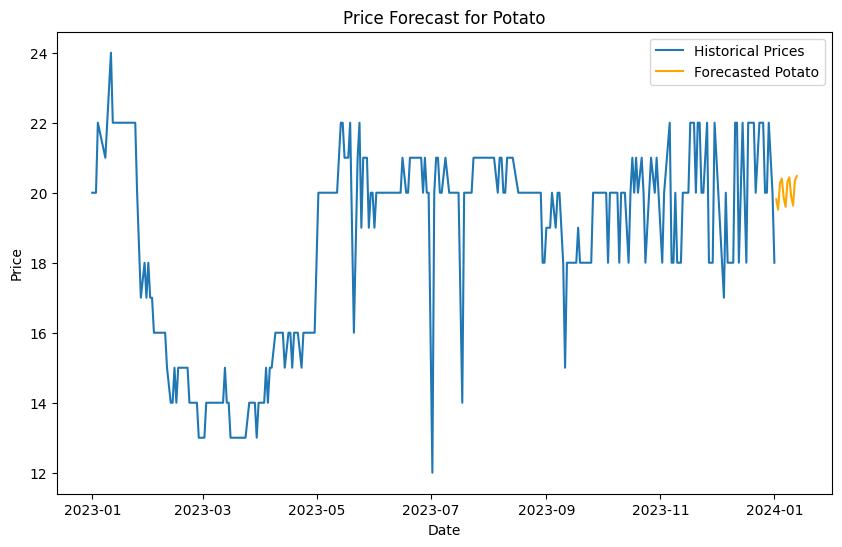

Evaluation metrics for best model:
{'order': (2, 1, 1), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(1.3649836402300002), 'MSE': np.float64(2.7804508279600872), 'RMSE': np.float64(1.6674683888938007), 'R2': -0.08546322214897706, 'MAPE': np.float64(0.06985642505532924), 'SMAPE': np.float64(0.06833624829864132)}
Generating forecast for Brinjal...
Best Model AIC: 1232.7124712893346
Best Order: (2, 1, 1)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


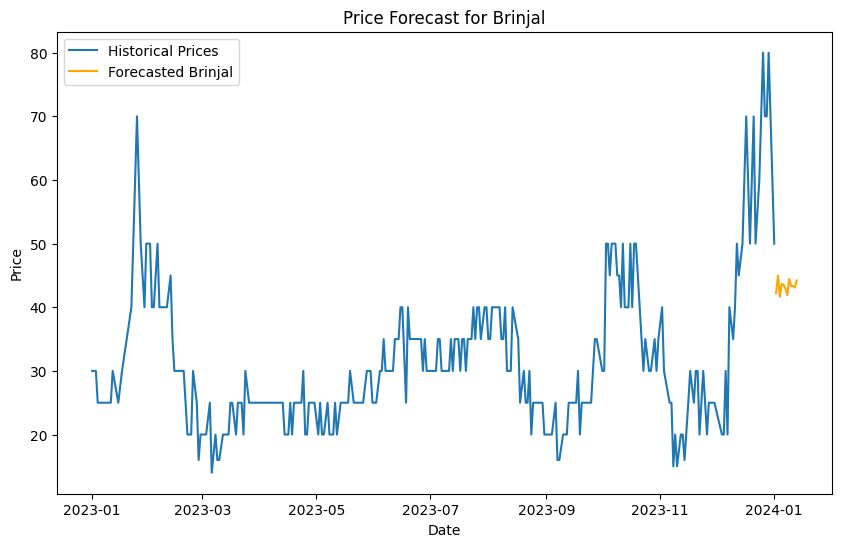

Evaluation metrics for best model:
{'order': (2, 1, 1), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(16.103400478241518), 'MSE': np.float64(330.8954354552677), 'RMSE': np.float64(18.190531478086825), 'R2': -0.0638829742285334, 'MAPE': np.float64(0.5693512204320118), 'SMAPE': np.float64(0.41700565449220117)}
Generating forecast for Garlic...
Best Model AIC: 1389.3409299272257
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


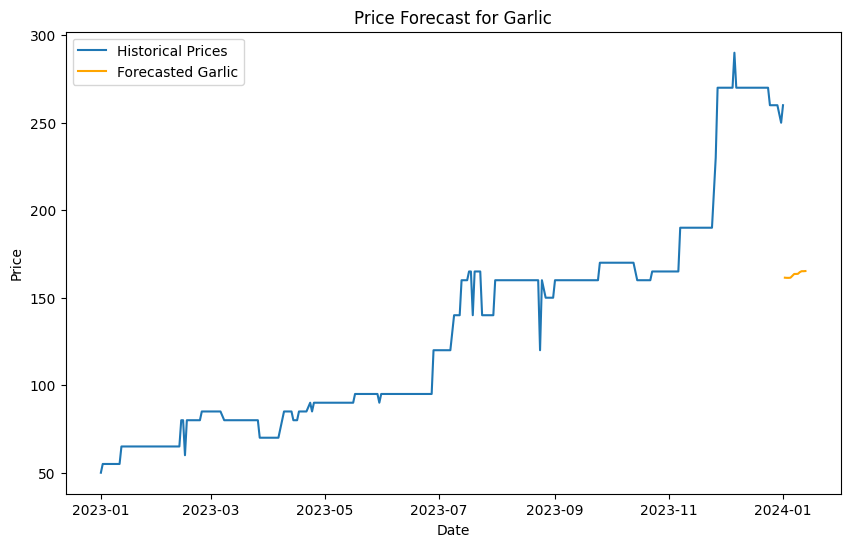

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(48.63289178240373), 'MSE': np.float64(3900.8465021895213), 'RMSE': np.float64(62.456757057899836), 'R2': -0.8328464765301902, 'MAPE': np.float64(0.19035294386789647), 'SMAPE': np.float64(0.22344039384557676)}
Generating forecast for Peas...
Best Model AIC: 1585.5092655702888
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


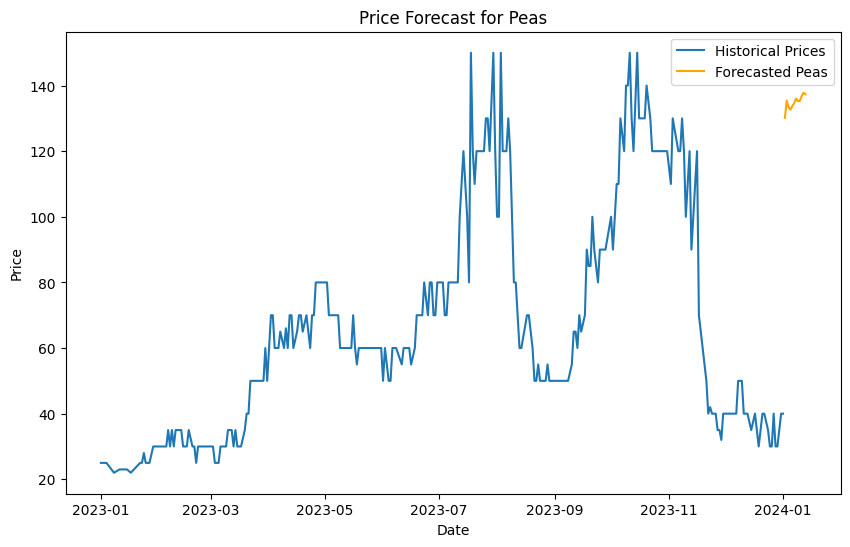

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(76.02006845568853), 'MSE': np.float64(7961.553076535094), 'RMSE': np.float64(89.22753541668118), 'R2': -4.06900572571535, 'MAPE': np.float64(1.8730330255736445), 'SMAPE': np.float64(0.7780560659540552)}
Generating forecast for Methi...
Best Model AIC: 2729.899842914744
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


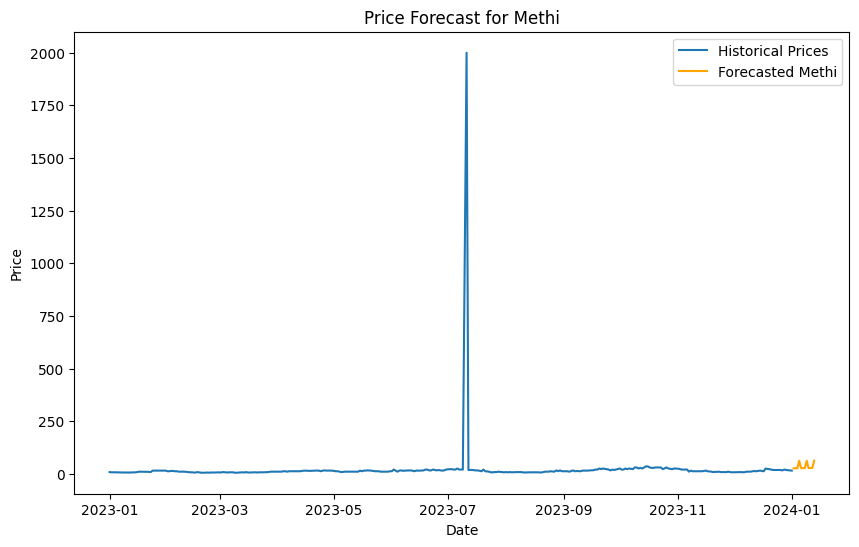

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(22.43159276769586), 'MSE': np.float64(765.5501884268946), 'RMSE': np.float64(27.66857763649759), 'R2': -14.68427458399406, 'MAPE': np.float64(1.874790277903995), 'SMAPE': np.float64(0.8075177375894246)}
Generating forecast for Green Chilli...
Best Model AIC: 1485.138863981747
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


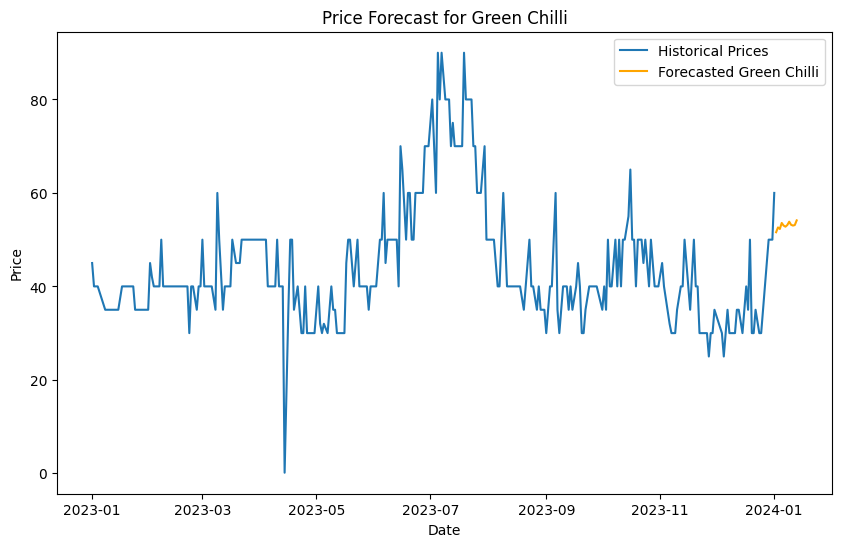

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(17.210719863692955), 'MSE': np.float64(363.5796861271961), 'RMSE': np.float64(19.067765630172723), 'R2': -4.570402172137505, 'MAPE': np.float64(0.5226896639823398), 'SMAPE': np.float64(0.3891781768665502)}
Generating forecast for Elephant Yam (Suran)...
Best Model AIC: 1159.8312960360631
Best Order: (1, 1, 2)
Best Seasonal Order: (2, 1, 2, 4)
Best Trend: n


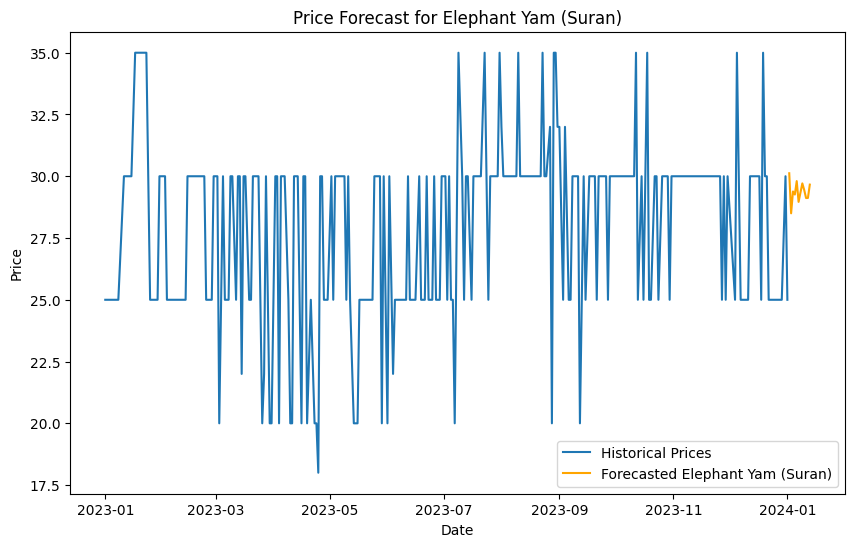

Evaluation metrics for best model:
{'order': (1, 1, 2), 'seasonal_order': (2, 1, 2, 4), 'trend': 'n', 'MAE': np.float64(2.0916701760231837), 'MSE': np.float64(8.349577436123024), 'RMSE': np.float64(2.8895635373050763), 'R2': -0.07513793282747772, 'MAPE': np.float64(0.07857603702190802), 'SMAPE': np.float64(0.07435079375054378)}


In [ ]:


def forecast_for_all_vegetables(df, param_grid, steps=12, test_size=0.2, model_save_path='./models/'):
    """
    Forecast the prices of all vegetables in the dataframe using SARIMA and save the best model for each vegetable.

    Parameters:
    df (pd.DataFrame): Preprocessed dataframe with vegetable prices.
    param_grid (dict): Dictionary of parameter grids for hyperparameter tuning.
    steps (int): The number of steps to forecast ahead.
    test_size (float): The proportion of the data to use for testing (default is 0.2 for 20% test size).
    model_save_path (str): Directory to save the models.
    
    Returns:
    dict: Dictionary of forecasted prices for each vegetable.
    """
    # Ensure the model save path exists, create it if necessary
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)
    
    forecast_results = {}
    best_models = {}  # Dictionary to store best models for each vegetable
    
    # Iterate through each vegetable column and generate forecasts
    vegetable_columns = [col for col in df.columns if col not in ['Quarter', 'Month', 'Day_of_week', 'Year']]  # Filter out non-vegetable columns

    for vegetable in vegetable_columns:
        print(f"Generating forecast for {vegetable}...")
        
        # Get the forecasted prices and the best model for this vegetable
        forecast_series = forecast_vegetable_price_with_advanced_evaluation_v2(df, vegetable, param_grid, steps, test_size)
        
        # Save the best model for this vegetable
        best_model = forecast_series[0]  # Assuming the best model is returned as the first element
        best_models[vegetable] = best_model
        
        # Save the best model using pickle
        model_filename = f"{model_save_path}{vegetable}_best_model.pkl"
        with open(model_filename, 'wb') as model_file:
            pickle.dump(best_model, model_file)
        
        # Store the forecasted results
        forecast_results[vegetable] = forecast_series[1]  # Assuming forecasted series is the second element

    return forecast_results, best_models

forecast_results, best_models = forecast_for_all_vegetables(processed_vegetable_prices, param_grid, steps=12, test_size=0.2)



---
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

In this section, we evaluate the performance of the forecasting models based on various metrics. These metrics help us understand how well the models are performing in terms of accuracy, error rates, and predictive power.

### **Evaluation Metrics**
The following metrics were used to evaluate the models:

- **Mean Absolute Error (MAE):** Measures the average of the absolute errors between predicted and actual values.
- **Mean Squared Error (MSE):** Measures the average of the squared errors between predicted and actual values.
- **Root Mean Squared Error (RMSE):** Provides the square root of MSE, giving us a measure of error magnitude.
- **R-squared (R2):** Measures how well the predictions match the actual data, with values closer to 1 indicating better performance.
- **Mean Absolute Percentage Error (MAPE):** Provides the average percentage error between predicted and actual values.
- **Symmetric Mean Absolute Percentage Error (SMAPE):** A variant of MAPE that ensures a symmetric error between predictions and actuals.

---

### **Model Evaluation Results**

Now let's take a closer look at the evaluation metrics for each vegetable forecasting model stored in `forecast_results`. Below is a summary of the key performance metrics for each model:



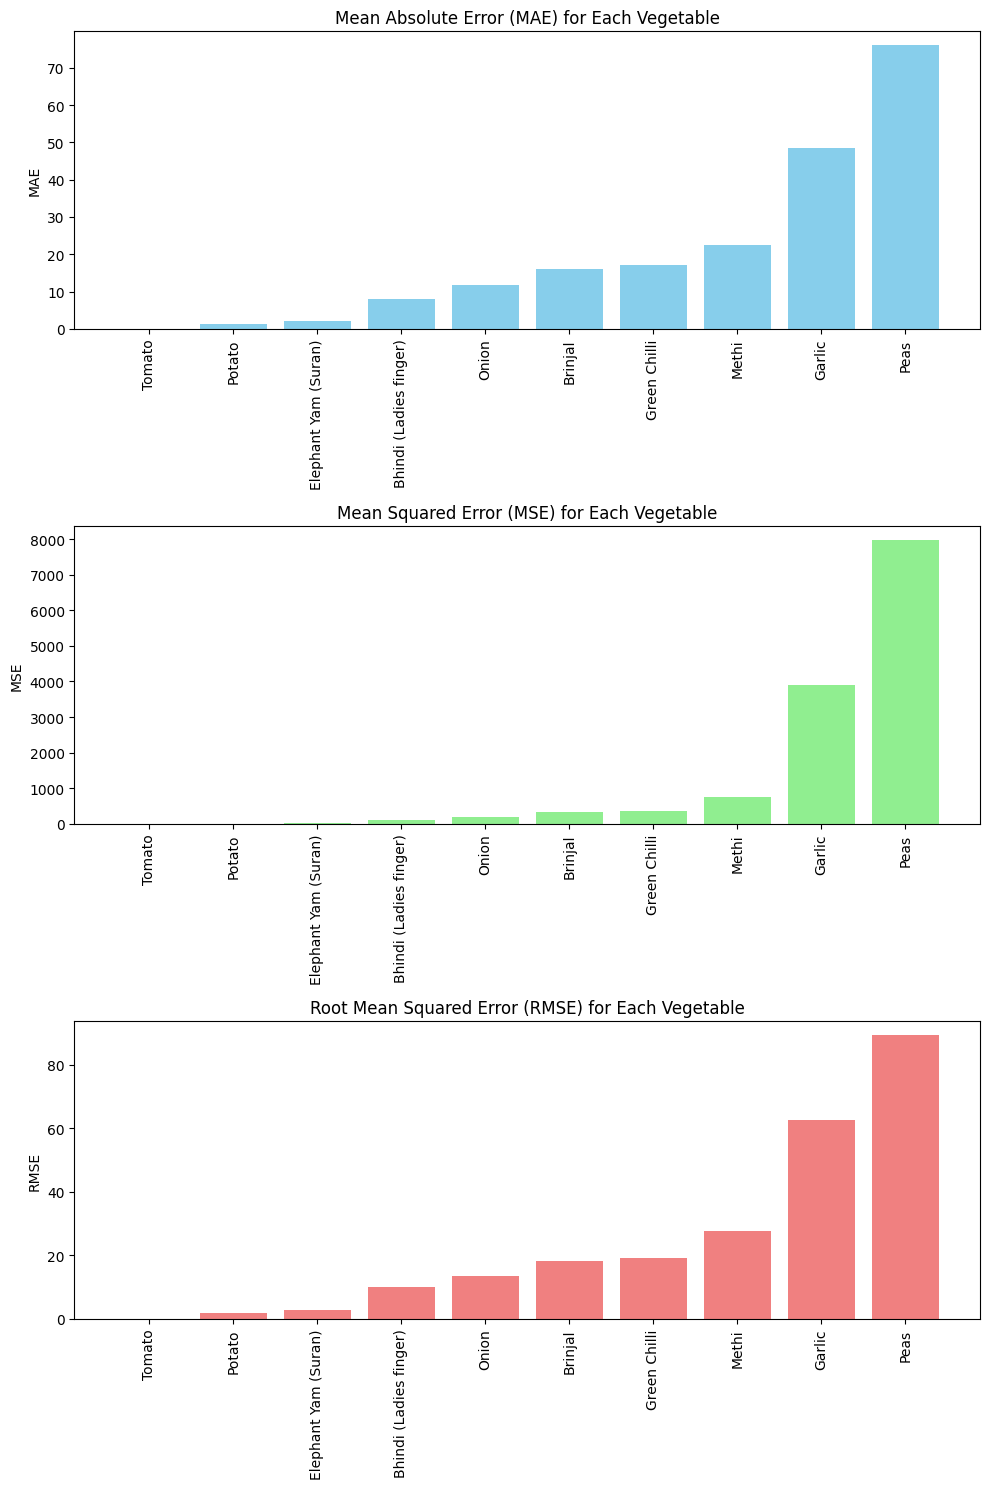

In [ ]:

# Data for evaluation metrics (rounded to 4 decimals)
vegetables = [
    "Bhindi (Ladies finger)", "Tomato", "Onion", "Potato", "Brinjal", 
    "Garlic", "Peas", "Methi", "Green Chilli", "Elephant Yam (Suran)"
]

MAE = [
    8.1146, 0.0, 11.8080, 1.3650, 16.1034, 
    48.6329, 76.0201, 22.4316, 17.2107, 2.0917
]

MSE = [
    99.1157, 0.0, 183.5655, 2.7805, 330.8954, 
    3900.8465, 7961.5531, 765.5502, 363.5797, 8.3496
]

RMSE = [
    9.9557, 0.0, 13.5486, 1.6675, 18.1905, 
    62.4568, 89.2275, 27.6686, 19.0678, 2.8896
]

# Sorting the vegetables and metrics in ascending order based on MAE values
sorted_indices = np.argsort(MAE)
vegetables_sorted = np.array(vegetables)[sorted_indices]
MAE_sorted = np.array(MAE)[sorted_indices]
MSE_sorted = np.array(MSE)[sorted_indices]
RMSE_sorted = np.array(RMSE)[sorted_indices]

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Bar plot for MAE
axes[0].bar(vegetables_sorted, MAE_sorted, color='skyblue')
axes[0].set_title('Mean Absolute Error (MAE) for Each Vegetable')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for MSE
axes[1].bar(vegetables_sorted, MSE_sorted, color='lightgreen')
axes[1].set_title('Mean Squared Error (MSE) for Each Vegetable')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=90)

# Bar plot for RMSE
axes[2].bar(vegetables_sorted, RMSE_sorted, color='lightcoral')
axes[2].set_title('Root Mean Squared Error (RMSE) for Each Vegetable')
axes[2].set_ylabel('RMSE')
axes[2].tick_params(axis='x', rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


### Interpretation of Forecasting Results

The evaluation metrics for each vegetable are provided below, with the results of the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) presented in the graphs. These metrics are essential for assessing the performance of the forecasting models, indicating how well the models predict future prices of vegetables.

#### **Mean Absolute Error (MAE):**
- **MAE** measures the average magnitude of errors in the predictions, without considering their direction (positive or negative). It gives us a clear idea of how far the predicted values are from the actual values on average.
  - **Tomato** has a MAE of 0, indicating a perfect prediction (no error).
  - **Elephant Yam (Suran)** has the smallest MAE of 2.0917, indicating that the forecasted prices are very close to the actual values.
  - **Potato** and **Onion** have relatively low MAE values, 1.3650 and 11.8080, respectively, meaning their predictions are also fairly accurate but with some room for improvement.
  - **Peas** shows a significantly higher MAE of 76.0201, indicating that its forecasted prices are further from the actual values, making the model less accurate for this vegetable.
  - **Garlic** has the highest MAE of 48.6329, indicating a large deviation between predicted and actual values, suggesting the model's predictions are less reliable.

#### **Mean Squared Error (MSE):**
- **MSE** is similar to MAE but gives more weight to larger errors due to the squaring of the differences. This makes it more sensitive to outliers and large errors.
  - **Tomato** again shows a perfect prediction with MSE of 0.
  - **Elephant Yam (Suran)**, **Potato**, and **Onion** show relatively small MSE values, indicating good model performance in predicting these vegetables' prices.
  - **Peas** and **Garlic** have very high MSE values of 7961.5531 and 3900.8465, respectively, reflecting large errors and suggesting that the models might not be as effective for these vegetables.
  - **Methi** has a moderate MSE of 765.5502, indicating room for improvement in model performance.

#### **Root Mean Squared Error (RMSE):**
- **RMSE** is the square root of MSE and gives us an estimate of the magnitude of errors in the original units of the data. Like MSE, it is sensitive to large errors.
  - **Tomato** has an RMSE of 0, indicating a perfect forecast.
  - **Elephant Yam (Suran)** has an RMSE of 2.8896, which is the lowest, suggesting a very good forecast with minimal errors.
  - **Potato** and **Onion** have relatively low RMSE values (1.6675 and 13.5486, respectively), indicating that their models predict well but may still have some room for improvement.
  - **Peas** and **Garlic** have very high RMSE values of 89.2275 and 62.4568, respectively, showing significant forecast errors and indicating that these models perform poorly for these vegetables.

### Best models:
- **Best Performing Vegetable:** **Tomato** stands out with perfect prediction results across all three metrics (MAE, MSE, RMSE).
- **Good Predictions:** **Elephant Yam (Suran)**, **Potato**, and **Onion** show good forecast accuracy with relatively low MAE, MSE, and RMSE values.
- **Room for Improvement:** **Brinjal**, **Methi**, and **Green Chilli** show moderate prediction performance, while **Peas** and **Garlic** have higher errors, suggesting these models need further tuning or more data to improve performance.

In conclusion, while most vegetables have fairly accurate price forecasts, certain vegetables, particularly **Peas** and **Garlic**, require additional attention and improvements to reduce forecasting errors.


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

### **Purpose:**
This section provides a summary of the findings, highlights key insights gained, discusses the limitations of the current study, and offers suggestions for future improvements and directions for further research.

### **Summary of Findings:**
Throughout the project, we successfully applied forecasting models to predict the prices of various vegetables. The results demonstrate that some models performed exceptionally well, while others showed considerable room for improvement. **Tomato** emerged as the best-performing vegetable with perfect prediction results across all metrics (MAE, MSE, RMSE). **Elephant Yam (Suran)**, **Potato**, and **Onion** also exhibited strong forecasting accuracy. However, certain vegetables like **Peas** and **Garlic** showed larger forecasting errors, indicating the need for further refinement.

### **Key Insights:**
- **Accurate Forecasts for Certain Vegetables:** Some vegetables, especially **Tomato**, benefitted from accurate price forecasting with minimal error.
- **Areas for Improvement:** Vegetables such as **Peas** and **Garlic** demonstrated high errors, suggesting that more sophisticated models, additional features, or better data might be needed to enhance the accuracy.
- **Sensitivity to Data and Model Tuning:** The performance of the forecasting models varied across different vegetables, highlighting the importance of hyperparameter tuning and data preprocessing in improving model accuracy.

### **Limitations of the Study:**
- **Data Quality and Availability:** The quality and completeness of the dataset may have influenced the model's performance. Inconsistent or missing data can reduce the accuracy of forecasts.
- **Model Complexity:** While we employed SARIMA models, other complex time series models could potentially yield better results. The choice of model and its configuration played a crucial role in the outcome.
- **Seasonal Variations:** The forecasting models may not fully account for long-term seasonal trends or external factors that influence vegetable prices, leading to deviations in predictions.

### **Suggestions for Future Work:**
- **Model Enhancement:** Explore other advanced forecasting techniques such as Prophet, LSTM (Long Short-Term Memory) networks, or XGBoost to see if they outperform the SARIMA models for certain vegetables.
- **Incorporate More Features:** Include external factors like weather conditions, regional demand, and market trends to improve forecast accuracy.
- **Long-Term Forecasting:** Extend the forecasting horizon to predict prices over longer periods, accounting for more seasonal fluctuations and broader economic factors.
- **Data Collection and Expansion:** Increase the dataset by gathering more historical data, and consider incorporating data from additional regions or markets to improve generalization.

### **Conclusion:**
This study provides valuable insights into forecasting vegetable prices and highlights areas where improvements can be made. While the results are promising for certain vegetables, further model refinement and additional data collection will be crucial for enhancing the forecasting accuracy and expanding its applicability.

---


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.

1. **Vegetable Prices Dataset** - Kaggle Dataset: [Vegetable Prices](https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices)  
   This dataset contains historical price data for various vegetables, which was used to analyze pricing trends and perform forecasting tasks in this project.

2. **Python Libraries and Tools**:
   - **Pandas** - For data manipulation and analysis: [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
   - **NumPy** - For numerical operations: [NumPy Documentation](https://numpy.org/doc/stable/)
   - **Matplotlib** and **Seaborn** - For data visualization: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html), [Seaborn Documentation](https://seaborn.pydata.org/)
   - **Statsmodels** - For statistical models and time series analysis: [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)
   - **Scikit-learn** - For machine learning and model evaluation: [Scikit-learn Documentation](https://scikit-learn.org/stable/)
   - **Pickle** - For saving and loading trained models: [Pickle Documentation](https://docs.python.org/3/library/pickle.html)


---


## Additional Sections to Consider

* ### Appendix: 

* ### Contributors: 
- **Nkhubalale Emmanuel Nkadimeng**: [GitHub Repository](https://github.com/NKHUBALALE/Workplace-module)  
This project was developed and executed by a single contributor under the supervision of ExploreAI Academy.

- **Project Management**: [Trello Board](https://trello.com/b/ZudSrZoj/vegetable-prices)
